In [1]:
# Import all the libraries that we will be using

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import math

import scipy.stats as sp

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
# Import our data into a dataframe and view it

file = "caffeine.csv"
df=pd.read_csv(file)
df

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [3]:
# Copy DataFrame so that we do not overwrite the original

df2=df.copy()

In [4]:
# Some feature engineering to create density of caffeine and density of calories
df2['caffeine_per_100ml']= df2["Caffeine (mg)"]/df2["Volume (ml)"]*100
df2['calories_per_100ml']= df2["Calories"]/df2["Volume (ml)"]*100
df2.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000


In [5]:
# feature engineering. Create a column for diet versus regular. All drinks below 10 calories are diet 
# except for Tea, Water, and Energy shots which are never diet.

df2["diet"] = True
for k in range(len(df2)):
    if df2.Calories.values.tolist()[k] < 10:
        df2.loc[k, "diet"] = "Diet"
    else:
        df2.loc[k, "diet"] = "Regular"
    if (df2.loc[k, "type"] == "Water") | (df2.loc[k, "type"] == "Tea") | (df2.loc[k, "type"] == "Energy Shots"):
        df2.loc[k, "diet"] = "Regular"
df2.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000,Diet
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000,Diet
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001,Regular


In [6]:
# Rename columns and create a nice presentation of the dataframe

df3 = df2.rename(columns = {"drink": "Drink Name", "type": "Type", "caffeine_per_100ml": "Caffeine per 100 ml",
                            "calories_per_100ml": "Calories per 100 ml", "Volume (ml)": "Volume (ml)  ",
                            "Calories": "Calories"})
#df3.style.set_properties(**{'text-align': 'center'})
#df3.groupby("Type").head(1).set_index("Drink Name")

df3 = df3.groupby("Type").head(1).style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
df3.set_properties(**{'text-align': 'left'}).hide_index()

C:\Users\sajid\AppData\Local\Temp\ipykernel_12768\3492005763.py:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df3.set_properties(**{'text-align': 'left'}).hide_index()


Drink Name,Volume (ml),Calories,Caffeine (mg),Type,Caffeine per 100 ml,Calories per 100 ml,diet
Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000,Diet
28 Black Energy Drink,250.191810,125,80,Energy Drinks,31.975467,49.961667,Regular
Spike Energy Double Shot,125.983110,0,350,Energy Shots,277.815018,0.000000,Regular
Red Bull Simply Cola,250.191810,0,32,Soft Drinks,12.790187,0.000000,Diet
PG Tips Black Tea,200.508330,0,50,Tea,24.936620,0.000000,Regular
Perrier Energize,250.191810,35,99,Water,39.569641,13.989267,Regular


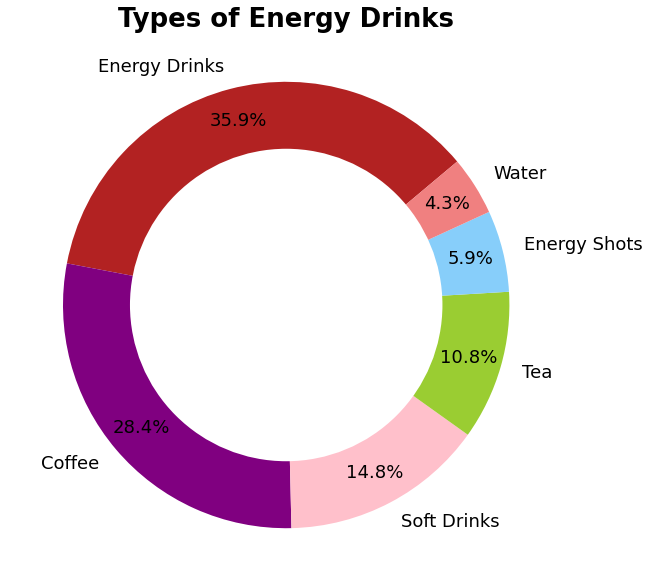

In [7]:
# Pie Chart of different types of energy drinks

drink_types = df2.type.value_counts().index.tolist()
drink_type_counts = df2.type.value_counts().values.tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(10,10))

plt.title("Types of Energy Drinks", fontsize = 26, fontweight = "bold", font = "DejaVu Sans")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')



plt.pie(drink_type_counts, explode=explode, labels=drink_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 18}, pctdistance=0.85)

fig.gca().add_artist(centre_circle)
plt.show()

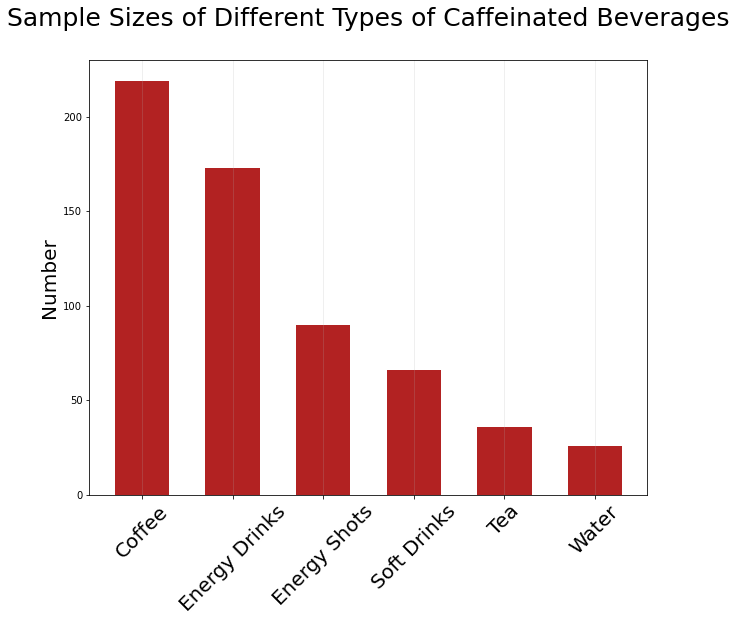

In [8]:
# Bar Graph of different types of energy drinks

# step 1, get the data

x = df2.type.sort_values().unique()
y = df2.type.sort_values().value_counts()

# step 2, init the plot

fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="firebrick", width=0.6)

# step 3, customization

plt.title("Sample Sizes of Different Types of Caffeinated Beverages\n", fontsize = 25)

plt.ylabel("Number", fontsize = 20)
plt.grid(axis="x", alpha=0.25)
# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)
# Sets the y limits of the current chart
#plt.ylim(0, max(y)+20)
plt.xticks(rotation=45, fontsize = 20)
# step 4, saving/showing
plt.show()

This section is about analysis for caffeine

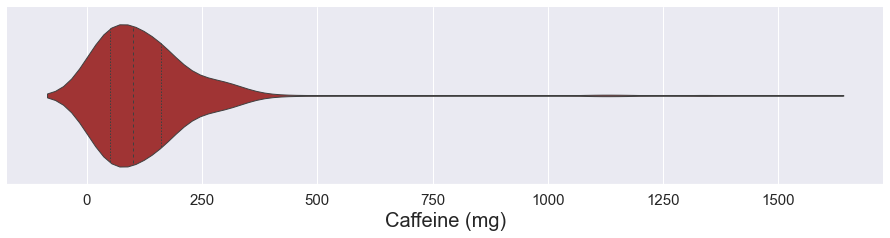

In [9]:
# Violin Plot of Caffeine distribution

sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.violinplot(data=df2, x="Caffeine (mg)", split=True, inner="quart", linewidth=1, palette = {"firebrick"})
sns.despine(left=True)
plt.xlabel("Caffeine (mg)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

In [10]:
df2["Caffeine (mg)"].quantile(q=[0,0.25, 0.5, 0.75, 1])

0.00       0.0
0.25      50.0
0.50     100.0
0.75     160.0
1.00    1555.0
Name: Caffeine (mg), dtype: float64

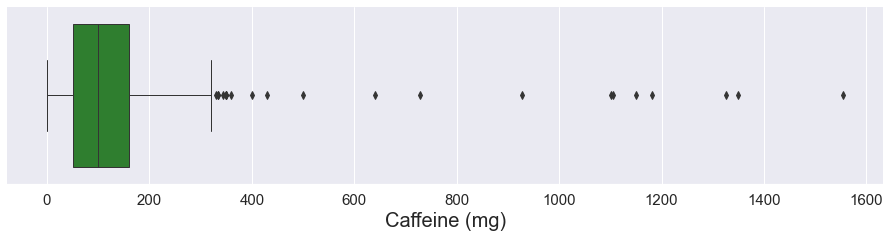

In [11]:
# Box Plot of Caffeine distribution to see outliers

sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.boxplot(data=df2, x="Caffeine (mg)", linewidth=1, palette = {"forestgreen"})
sns.despine(left=True)
plt.xlabel("Caffeine (mg)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

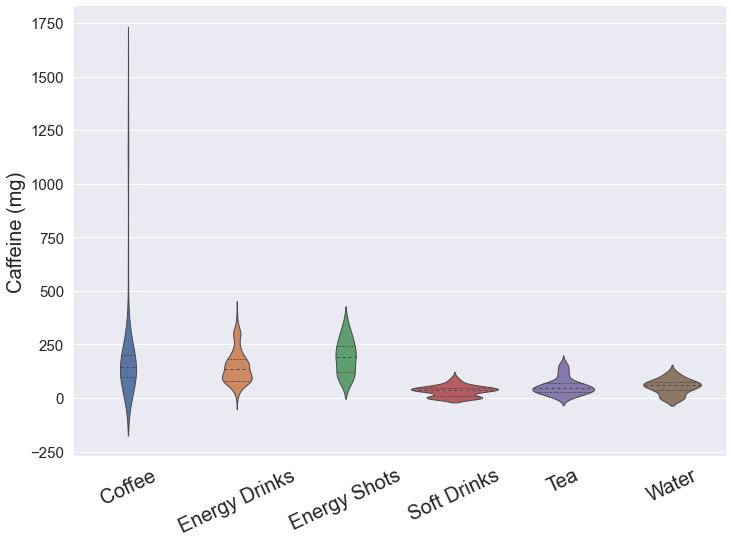

In [12]:
# Caffeine by drink type

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df2, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)
plt.ylabel("Caffeine (mg)", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel("")
plt.xticks(fontsize = 20, rotation = 25)
plt.show()

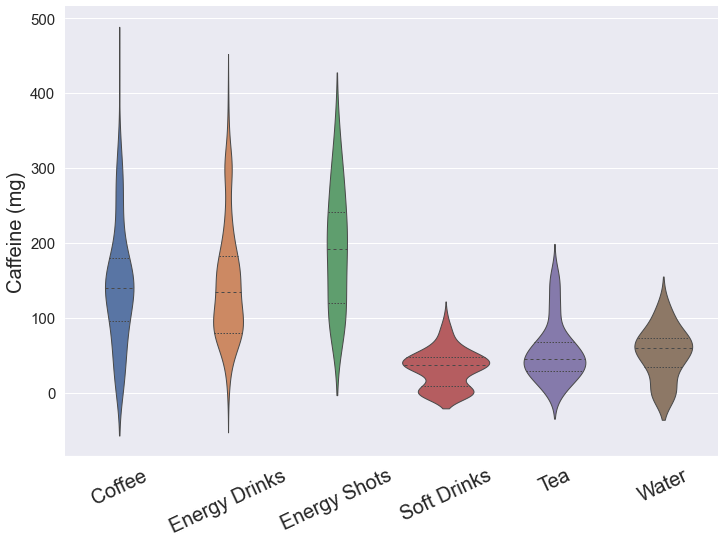

In [13]:
# filtering out the outliers in the coffee category

df2caf_filter = df2.loc[df2["Caffeine (mg)"] < 500].set_index('drink')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df2caf_filter, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)
plt.ylabel("Caffeine (mg)", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel("")
plt.xticks(fontsize = 20, rotation = 25)
plt.show()

In [14]:
df2.loc[df2.type == "Coffee"].sort_values(by='Volume (ml)', ascending=False).reset_index(drop=True).head(10)
#["drink", "Caffeine (mg)", "caffeine_per_100ml"]

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet
0,Starbucks Bottled Iced Coffee,1419.528000,240,640,Coffee,45.085409,16.907028,Regular
1,Baskin Robbins Cappuccino Blast,709.764000,470,234,Coffee,32.968705,66.219194,Regular
2,Dunkin' Donuts Iced Latte,709.764000,100,166,Coffee,23.388056,14.089190,Regular
3,Dunkin' Donuts Iced Coffee,709.764000,20,297,Coffee,41.844895,2.817838,Regular
4,Dunkin' Cold Brew,709.764000,5,260,Coffee,36.631895,0.704460,Diet
5,Tim Hortons Large Brewed Coffee,591.470000,5,270,Coffee,45.648976,0.845351,Diet
6,Dutch Bros Coffee (Classic),591.470000,10,187,Coffee,31.616143,1.690703,Regular
7,Zola Coconut Water Espresso,517.536250,0,125,Coffee,24.152898,0.000000,Diet
8,Barista Bros Iced Coffee,500.087885,204,140,Coffee,27.995079,40.792830,Regular
9,Dare Iced Coffee,500.087885,429,160,Coffee,31.994376,85.784922,Regular


This section is about analysis for Calories

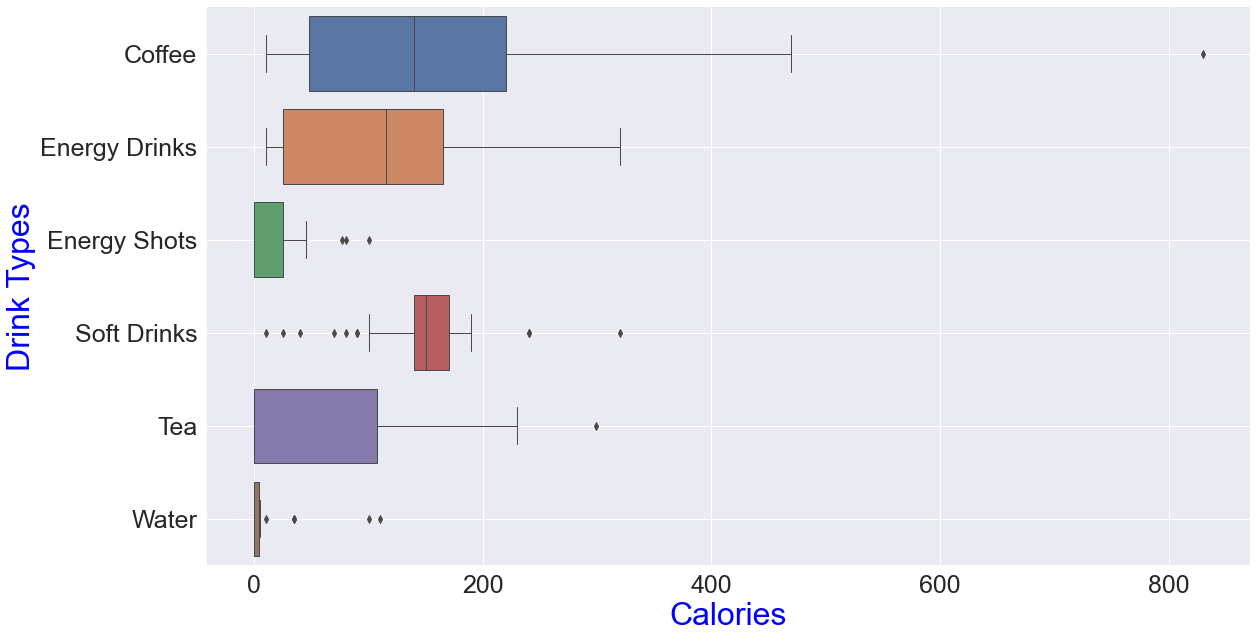

In [15]:
#boxplots of Calories in different types of energy drinks to find outliers

sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.boxplot(data=df2.loc[df2.diet == "Regular"], y="type", x="Calories", linewidth=1)
sns.despine(left=True)
plt.xlabel("Calories", fontsize = 32, color = "blue")
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel("Drink Types", fontsize = 32, color = "blue")
ax.grid(True, which = 'both')
plt.show()

In [16]:
# filter for outliers from the boxplot above.

mask1 = (df2["type"] == "Coffee") & (df2["Calories"] < 500)
mask2 = (df2["type"] == "Water") & (df2["Calories"] < 5)
mask3 = (df2["type"] == "Energy Shots") & (df2["Calories"] < 75)
mask4 = (df2["type"] == "Tea") & (df2["Calories"] < 270)
mask5 = (df2["type"] == "Energy Drinks")
mask6 = (df2["type"] == "Soft Drinks") & (df2["Calories"] < 200) & (df2["Calories"] > 95)
df2cal_filter = df2.loc[df2.diet == "Regular"]
df2cal_filter = df2.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6].set_index('drink')
#df2cal_filter.head()

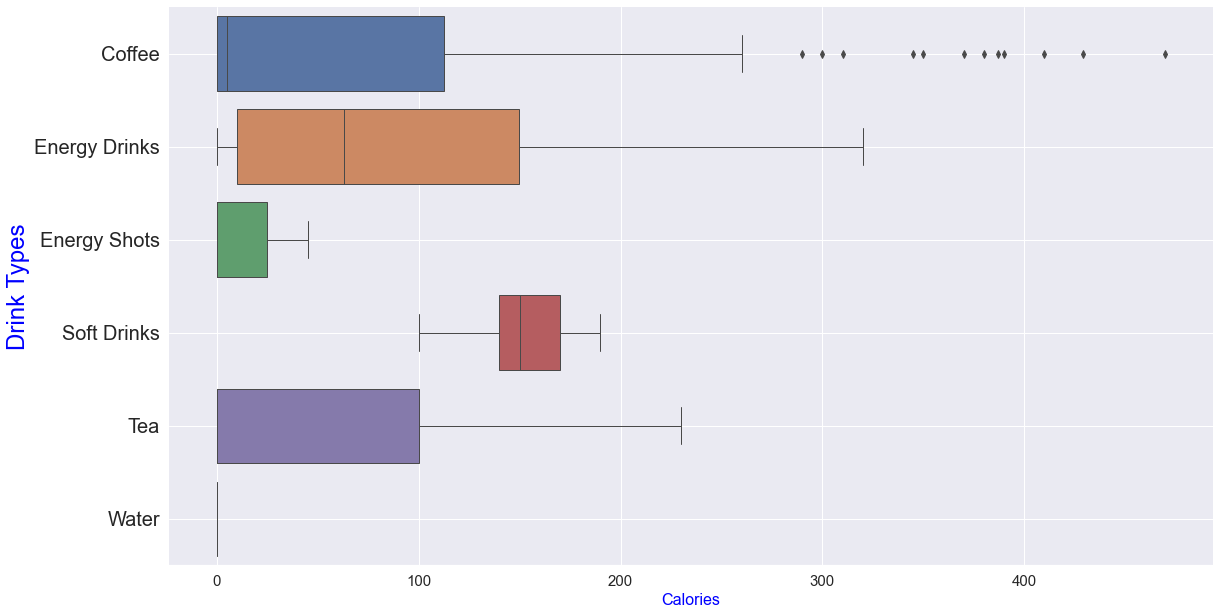

In [17]:
# Create a new boxplot after filtering out the outliers. 

sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.boxplot(data=df2cal_filter, y="type", x="Calories", linewidth=1)
sns.despine(left=True)
plt.xlabel("Calories", fontsize = 16, color = "blue")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Drink Types", fontsize = 24, color = "blue")
ax.grid(True, which = 'both')
plt.show()

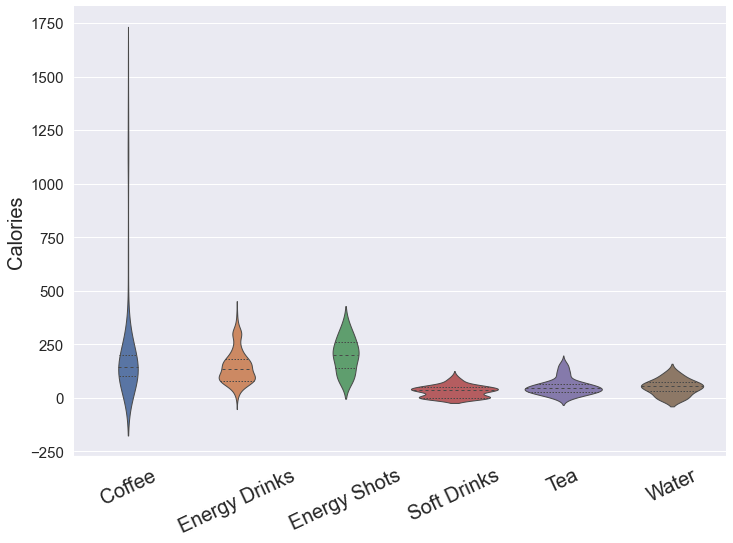

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df2cal_filter, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)
plt.ylabel("Calories", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel("")
plt.xticks(fontsize = 20, rotation = 25)
plt.show()

In [19]:
df2cal_filter.groupby("type").mean()

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
type,,,,,
Coffee,335.072569,69.098837,201.686047,67.192820,18.573091
Energy Drinks,388.971198,86.671233,147.867580,38.395152,23.188496
Energy Shots,58.331488,10.212121,200.393939,401.443612,28.014768
Soft Drinks,353.574540,154.298246,31.982456,8.978729,43.642177
Tea,358.740204,48.969231,54.400000,17.030276,11.456475
Water,392.160175,0.000000,50.894737,13.523075,0.000000


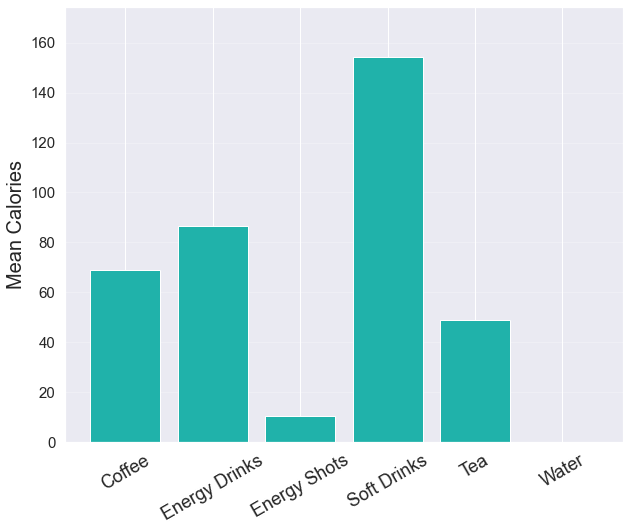

In [20]:
#BAR GRAPH OF MEAN CALORIES BY DRINK TYPE AFTER DATA HAS BEEN FILTERED FOR OUTLIERS AND DIET BEVERAGES

# step 1, get the data
x = df2cal_filter.groupby("type").mean().index.values
y = df2cal_filter.groupby("type").mean().Calories.values


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
#plt.title("Calories by drink type")
plt.ylabel("Mean Calories", fontsize = 20)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=30, fontsize = 18)
plt.yticks(fontsize = 15)

# step 4, saving/showing
plt.show()

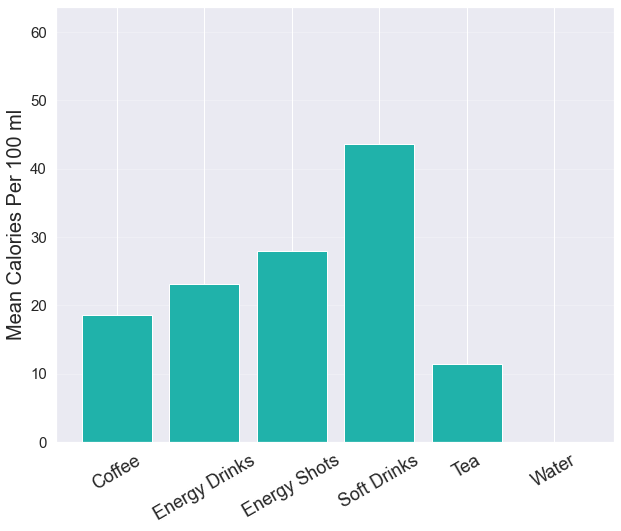

In [21]:
#BAR GRAPH OF MEAN CALORIC DENSITY (PER 100 ML) BY DRINK TYPE AFTER DATA HAS BEEN FILTERED FOR OUTLIERS AND DIET BEVERAGES

# step 1, get the data
x = df2cal_filter.groupby("type").mean().index.values
y = df2cal_filter.groupby("type").mean().calories_per_100ml.values


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
#plt.title("Calories by drink type")
plt.ylabel("Mean Calories Per 100 ml", fontsize = 20)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=30, fontsize = 18)
plt.yticks(fontsize = 15)

# step 4, saving/showing
plt.show()

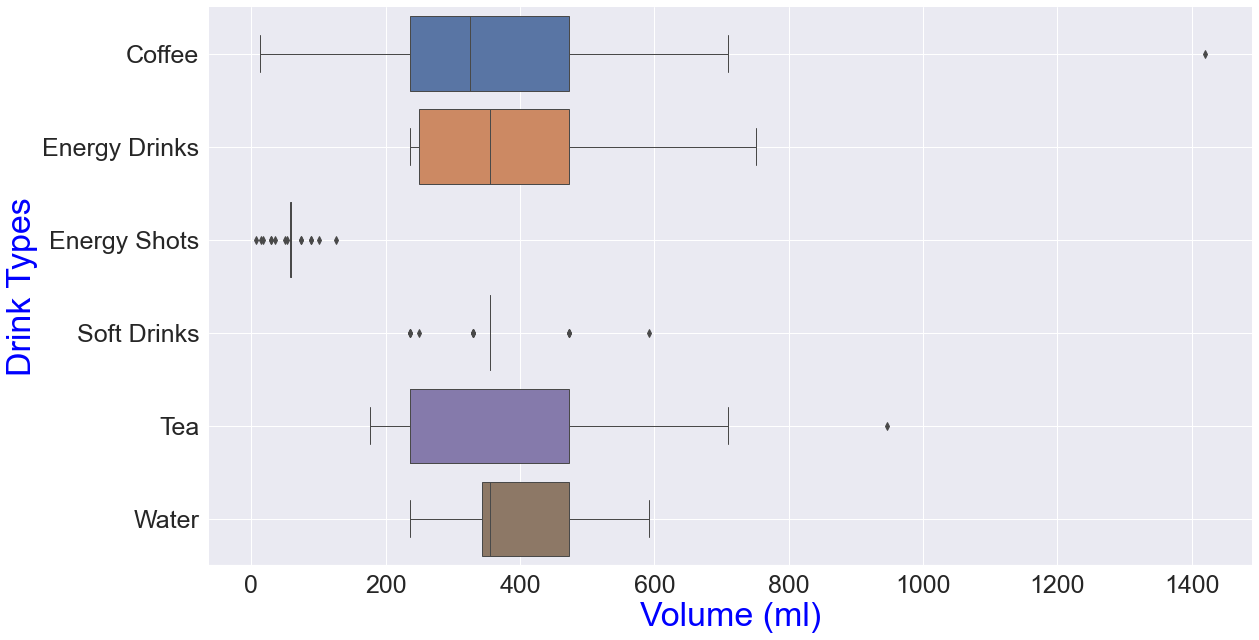

In [22]:
# This section is for an analysis on Volume

sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.boxplot(data=df2, y="type", x="Volume (ml)", linewidth=1)
sns.despine(left=True)
plt.xlabel("Volume (ml)", fontsize = 34, color = "blue")
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel("Drink Types", fontsize = 34, color = "blue")
ax.grid(True, which = 'both')
plt.show()

In [23]:
# This section is to remove outliers in volume 

maskv1 = (df2["type"] == "Coffee") & (df2["Volume (ml)"] < 1400)
maskv2 = (df2["type"] == "Energy Shots") & (df2["Volume (ml)"] > 54) & (df2["Volume (ml)"] < 65)
maskv3 = (df2["type"] == "Tea") & (df2["Volume (ml)"] < 800)
maskv4 = (df2["type"] == "Soft Drinks") & (df2["Volume (ml)"] < 400) & (df2["Volume (ml)"] > 340)
maskv5 = (df2["type"] == "Water")
maskv6 = (df2["type"] == "Energy Drinks")
df2vol_filter = df2.loc[maskv1 | maskv2 | maskv3 | maskv4 | maskv5 | maskv6].set_index('drink')
#df2vol_filter.head()

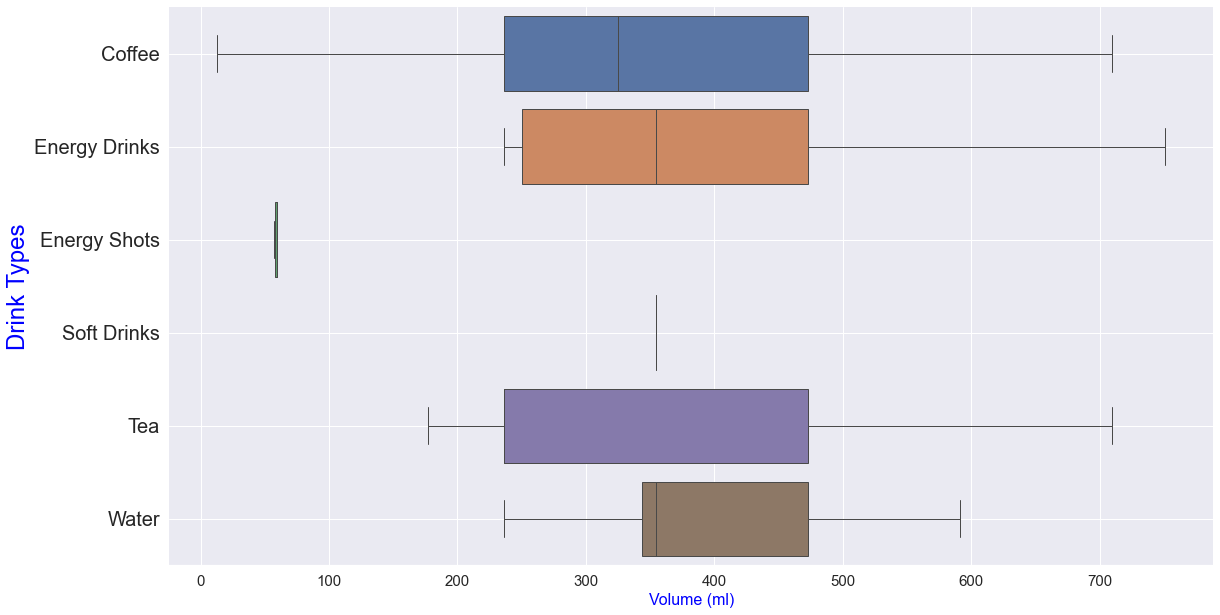

In [24]:
# After removing outliers

sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.boxplot(data=df2vol_filter, y="type", x="Volume (ml)", linewidth=1)
sns.despine(left=True)
plt.xlabel("Volume (ml)", fontsize = 16, color = "blue")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Drink Types", fontsize = 24, color = "blue")
ax.grid(True, which = 'both')
plt.show()

In [25]:
df2.columns

Index(['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'caffeine_per_100ml', 'calories_per_100ml', 'diet'],
      dtype='object')

In [26]:
# let us combine the filtered data sets of caffeine, calories, and volume by inner merging the three filtered sets

df2full_filter1 = df2caf_filter.merge(df2cal_filter, on=['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'caffeine_per_100ml', 'calories_per_100ml', 'diet'], how='inner')
df2full_filter = df2full_filter1.merge(df2vol_filter, on=['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'caffeine_per_100ml', 'calories_per_100ml', 'diet'], how='inner')
df2full_filter.head()

,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet
drink,,,,,,,
Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000,Diet
Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000,Diet
Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001,Regular
Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000,Diet
Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000,Diet


In [27]:
# Let us do some regression analysis based on our cleaned data set. First I will rename columns and do some correlations
df2full_filter = df2full_filter.rename(columns = {"caffeine_per_100ml": "Caffeine Per 100 ml", "calories_per_100ml": "Calories Per 100 ml"})
df2full_filter.corr()

,Volume (ml),Calories,Caffeine (mg),Caffeine Per 100 ml,Calories Per 100 ml
Volume (ml),1.000000,0.344554,0.189190,-0.490511,0.103493
Calories,0.344554,1.000000,-0.107022,-0.232220,0.909358
Caffeine (mg),0.189190,-0.107022,1.000000,0.467557,-0.185042
Caffeine Per 100 ml,-0.490511,-0.232220,0.467557,1.000000,-0.157923
Calories Per 100 ml,0.103493,0.909358,-0.185042,-0.157923,1.000000


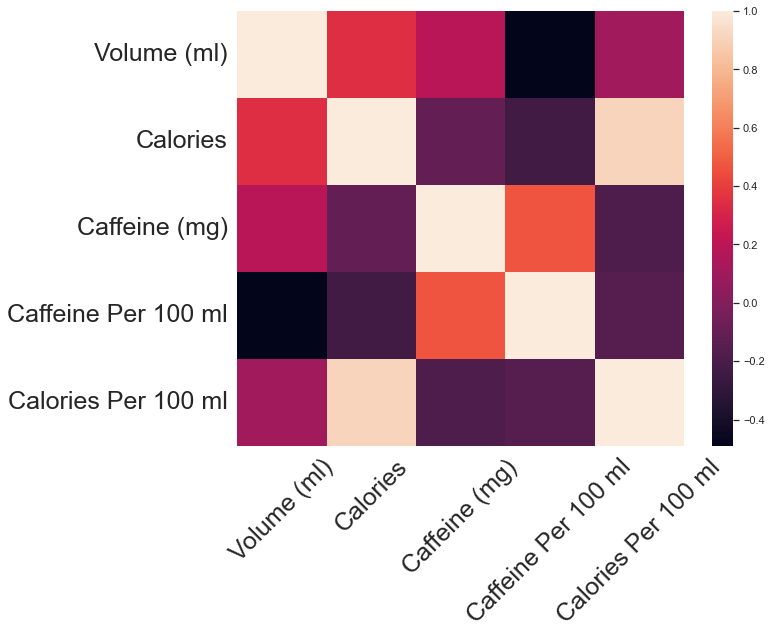

In [28]:
sns.set(rc={'figure.figsize':(10,8)})
s1 = sns.heatmap(df2full_filter.corr())
plt.xticks(rotation=45, fontsize=25)
plt.yticks(rotation=0, fontsize=25)
plt.show()

In [29]:
df2full_filter.columns

Index(['Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'Caffeine Per 100 ml', 'Calories Per 100 ml', 'diet'],
      dtype='object')

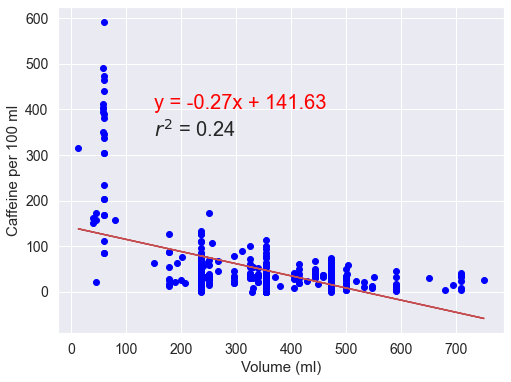

In [30]:
# Density of Caffeine per 100ml versus volume (ml). This is because a negative correlation shows up.

plt.figure(figsize=(8,6))
y=df2full_filter["Caffeine Per 100 ml"].values
x=df2full_filter["Volume (ml)"].values
plt.scatter(x,y, c='blue')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Caffeine per 100 ml", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [150,400], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [150,340], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

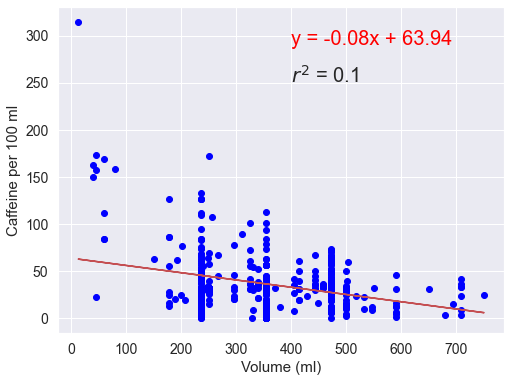

In [31]:
# Density of Caffeine per 100ml versus volume (ml). This is because a negative correlation shows up.
# We will filter out the vertical blue dots at 57 ml because those are all energy shots

mask = (df2full_filter["type"] != "Energy Shots")

plt.figure(figsize=(8,6))
y=df2full_filter.loc[mask]["Caffeine Per 100 ml"].values
x=df2full_filter.loc[mask]["Volume (ml)"].values
plt.scatter(x,y, c='blue')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Caffeine per 100 ml", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [400,290], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [400,250], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

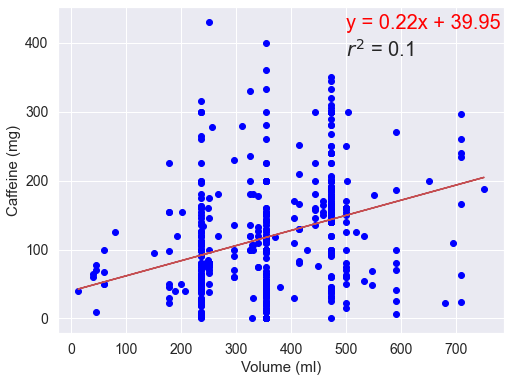

In [32]:
mask = (df2full_filter["type"] != "Energy Shots")

plt.figure(figsize=(8,6))
y=df2full_filter.loc[mask]["Caffeine (mg)"].values
x=df2full_filter.loc[mask]["Volume (ml)"].values
plt.scatter(x,y, c='blue')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Caffeine (mg)", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [500,420], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [500,380], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

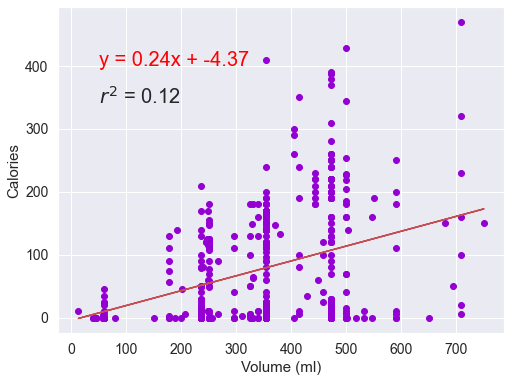

In [33]:
# We will do calories versus volume (ml) because the correlation is decent

#mask = (df2full_filter["type"] == "Energy Drinks") | (df2full_filter["type"] == "Coffee")
#mask = (df2full_filter["type"] != "Energy Shots")
plt.figure(figsize=(8,6))
y=df2full_filter["Calories"].values
x=df2full_filter["Volume (ml)"].values
plt.scatter(x,y, c='darkviolet')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Calories", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [50,400], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [50,340], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

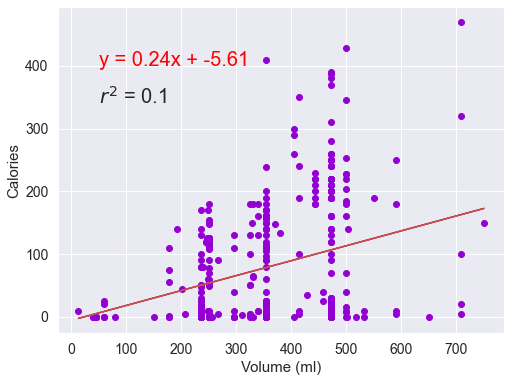

In [34]:
# We will filter the above graph for energy drinks and coffee because they are a little more interesting

mask = (df2full_filter["type"] == "Energy Drinks") | (df2full_filter["type"] == "Coffee")

plt.figure(figsize=(8,6))
y=df2full_filter.loc[mask]["Calories"].values
x=df2full_filter.loc[mask]["Volume (ml)"].values
plt.scatter(x,y, c='darkviolet')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Calories", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [50,400], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [50,340], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

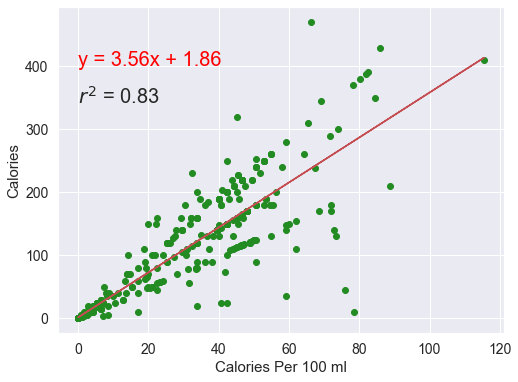

In [35]:
# Lastly, we will do a regression between Calories per 100 ml and Calories

plt.figure(figsize=(8,6))
y=df2full_filter["Calories"].values
x=df2full_filter["Calories Per 100 ml"].values
plt.scatter(x,y, c='forestgreen')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Calories Per 100 ml", fontsize = 15)
plt.ylabel("Calories", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [0,400], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [0,340], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

 In this section we will compare the distribution of caffeine in diet versus regular drinks

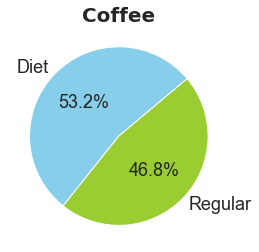

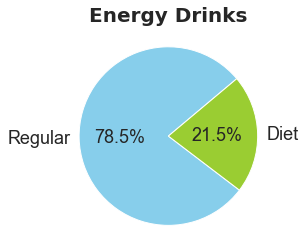

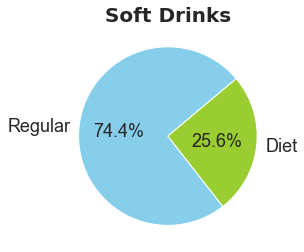

In [36]:
drinklist = ["Coffee", "Energy Drinks", "Soft Drinks"]
for dr in drinklist:
    mask55 = (df2.type == dr)
    drink_types = df2.loc[mask55]["diet"].value_counts().index.tolist()
    drink_type_counts = df2.loc[mask55]["diet"].value_counts().values.tolist()
    colors = ["skyblue", "yellowgreen"]

    fig = plt.figure(figsize=(4,4))

    plt.title(dr, fontsize = 20, fontweight = "bold", font = "DejaVu Sans")
    plt.axis("equal")

    plt.pie(drink_type_counts, labels=drink_types, colors=colors,
    autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 18}, pctdistance=0.55)
    plt.show()

In [37]:
mask28 = (df2caf_filter["type"] == "Coffee") | (df2caf_filter["type"] == "Energy Drinks") | (df2caf_filter["type"] == "Soft Drinks")
df2500seaborn = df2caf_filter.loc[mask28]
df2500seaborn = df2500seaborn.rename(columns = {"type": "Types of Caffeinated Beverages", "diet": "Calorie Type"})

In [38]:
df2500seaborn["Types of Caffeinated Beverages"].value_counts()

Energy Drinks    219
Coffee           162
Soft Drinks       90
Name: Types of Caffeinated Beverages, dtype: int64

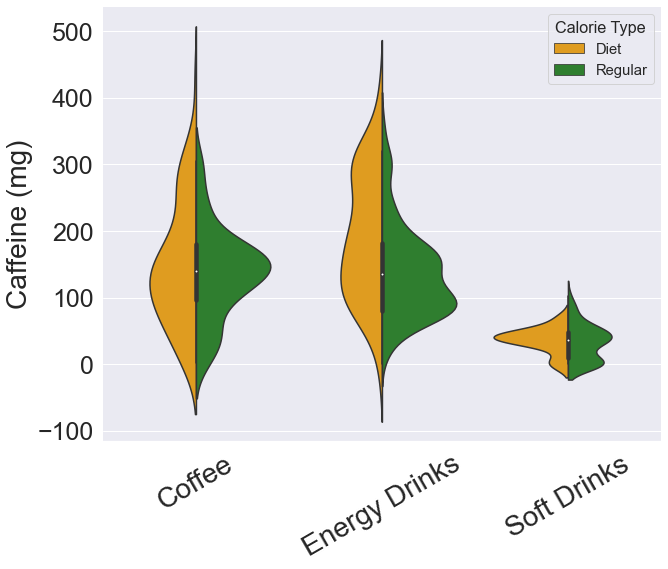

In [39]:
# Let us compare the distributions of caffeine in diet drinks versus regular drinks after filtering for caffeine outliers
# The only distributions that will show up our Coffee, Energy Drinks, and Soft Drinks, because the rest of the types
# have too many low calorie options

sns.set_theme(style='white')

sns.set(font_scale = 1.35)
#sns.set(x_label = "Types of Caffeinated Beverages")

sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)", 
                     hue="Calorie Type", split = True,
                     palette={"Regular": "forestgreen", "Diet": "orange"})
               #split=True, inner="quart", linewidth=1,
plt.ylabel("Caffeine (mg)", fontsize = 28)
plt.yticks(fontsize = 25)
plt.xlabel("")
plt.xticks(fontsize = 28, rotation = 30)

#plt.suptitle('Distribution of Caffeine in Different Types of Caffeinated Beverages')
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)

In this section, we will do a TTest to compare whether the distributions of Caffeine in Regular and Diet Drinks are 
the same. However, we will only do it for the above three types of drinks.

In [40]:
df2500seaborn.columns

Index(['Volume (ml)', 'Calories', 'Caffeine (mg)',
       'Types of Caffeinated Beverages', 'caffeine_per_100ml',
       'calories_per_100ml', 'Calorie Type'],
      dtype='object')

In [41]:
mask56 = (df2500seaborn['Types of Caffeinated Beverages'] == "Soft Drinks")
df2500seaborn.loc[mask56].groupby("Calorie Type").mean()

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
Calorie Type,,,,,
Diet,349.250177,0.000000,36.521739,10.494935,0.000000
Regular,357.300847,149.253731,32.701493,9.167403,41.910332


In [42]:
df2500seaborn.loc[mask56].groupby("Calorie Type").var()

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
Calorie Type,,,,,
Diet,493.074865,0.000000,348.715415,28.044576,0.000000
Regular,2142.333869,1927.555857,717.121664,53.451694,148.442613


In [43]:
# TTests for all three categories combined

mask57 = (df2500seaborn['Calorie Type'] == "Diet")
mask58 = (df2500seaborn['Calorie Type'] == "Regular")

dietdrinks = df2500seaborn.loc[mask57, "Caffeine (mg)"].tolist()
regulardrinks = df2500seaborn.loc[mask58, "Caffeine (mg)"].tolist()

print(sp.ttest_ind(dietdrinks,regulardrinks,equal_var=False))

Ttest_indResult(statistic=3.4292528090925902, pvalue=0.0007151764120272838)


In [44]:
# TTests for each individual category

drinklist = ["Coffee", "Energy Drinks", "Soft Drinks"]
for dr in drinklist:
    mask57 = (df2500seaborn['Calorie Type'] == "Diet") & (df2500seaborn['Types of Caffeinated Beverages'] == dr) 
    mask58 = (df2500seaborn['Calorie Type'] == "Regular") & (df2500seaborn['Types of Caffeinated Beverages'] == dr) 

    dietdrinks = df2500seaborn.loc[mask57, "Caffeine (mg)"].tolist()
    regulardrinks = df2500seaborn.loc[mask58, "Caffeine (mg)"].tolist()

    print(sp.ttest_ind(dietdrinks,regulardrinks,equal_var=False))

Ttest_indResult(statistic=1.087096168425908, pvalue=0.27877675588359624)
Ttest_indResult(statistic=3.771820937704053, pvalue=0.00037447164557003046)
Ttest_indResult(statistic=0.751166878369814, pvalue=0.455759884609354)


In this section we will do brand analysis. First we will create a new feature called brand and assign it to 
five major brands.

In [45]:
df2["brand"] = "Other"

for i in range(len(df2)):
    if df2.loc[i, 'drink'].find("Coca") != -1:
        df2.loc[i, 'brand'] = "Coca-Cola"
    elif df2.loc[i, 'drink'].find("Starb") != -1:
        df2.loc[i, 'brand'] = "Starbucks"
    elif df2.loc[i, 'drink'].find("Dunk") != -1:
        df2.loc[i, 'brand'] = "Dunkin"
    elif df2.loc[i, 'drink'].find("Peet") != -1:
        df2.loc[i, 'brand'] = "Peet's"
    elif df2.loc[i, 'drink'].find("Monst") != -1:
        df2.loc[i, 'brand'] = "Monster"

In [46]:
df2.brand.value_counts().index.tolist()

['Other', 'Starbucks', 'Monster', 'Coca-Cola', 'Dunkin', "Peet's"]

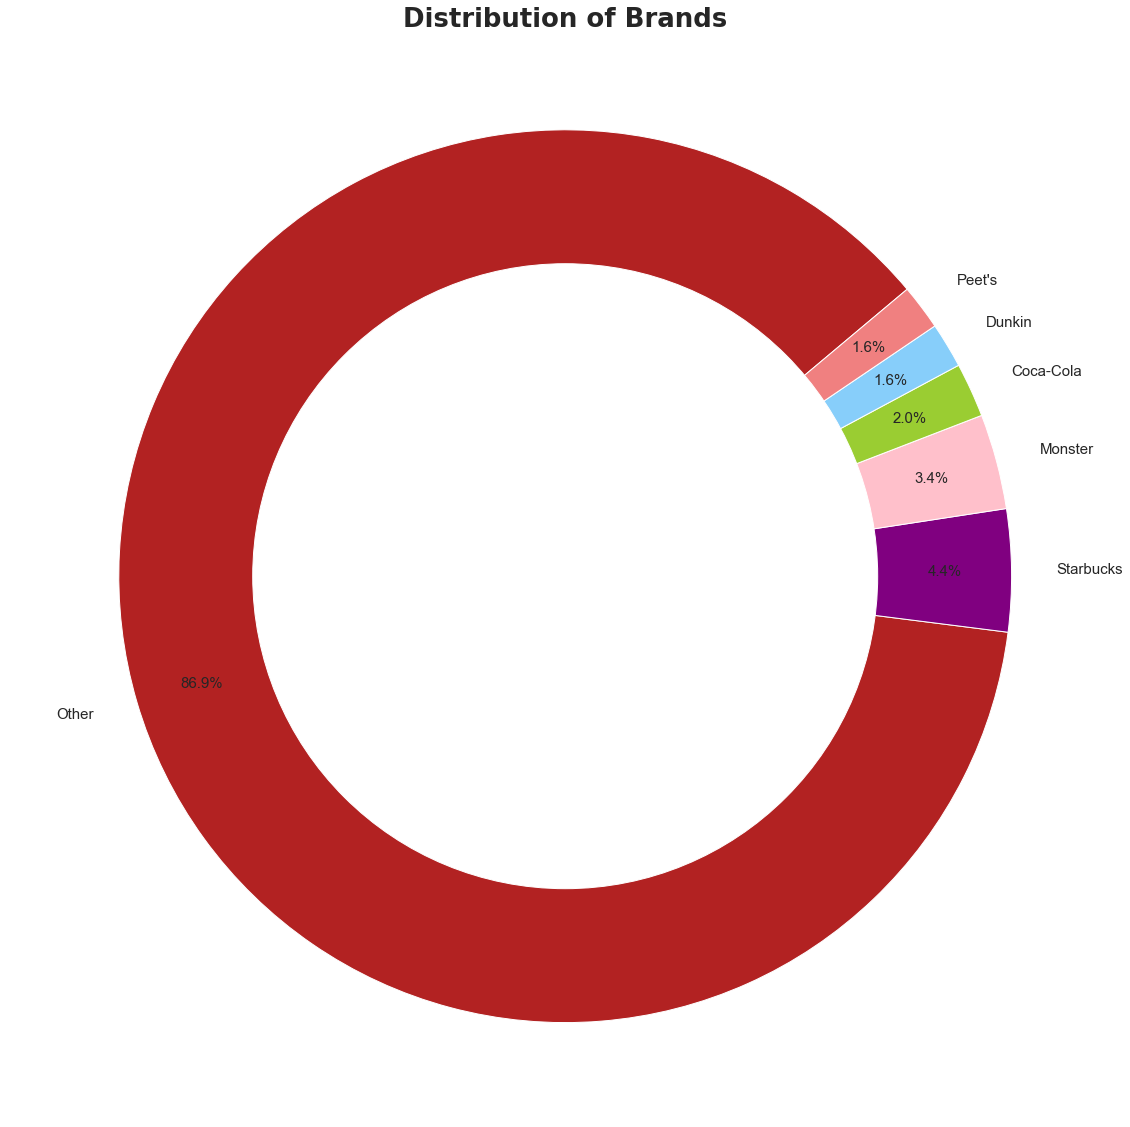

In [47]:
# Make a pie chart of the distribution of brands

drink_brands = df2.brand.value_counts().index.tolist()
drink_brand_counts = df2.brand.value_counts().tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(20,20))

plt.title("Distribution of Brands", fontsize = 26, fontweight = "bold", font = "DejaVu Sans")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')



plt.pie(drink_brand_counts, explode=explode, labels=drink_brands, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 15}, pctdistance=0.85)

fig.gca().add_artist(centre_circle)
plt.show()

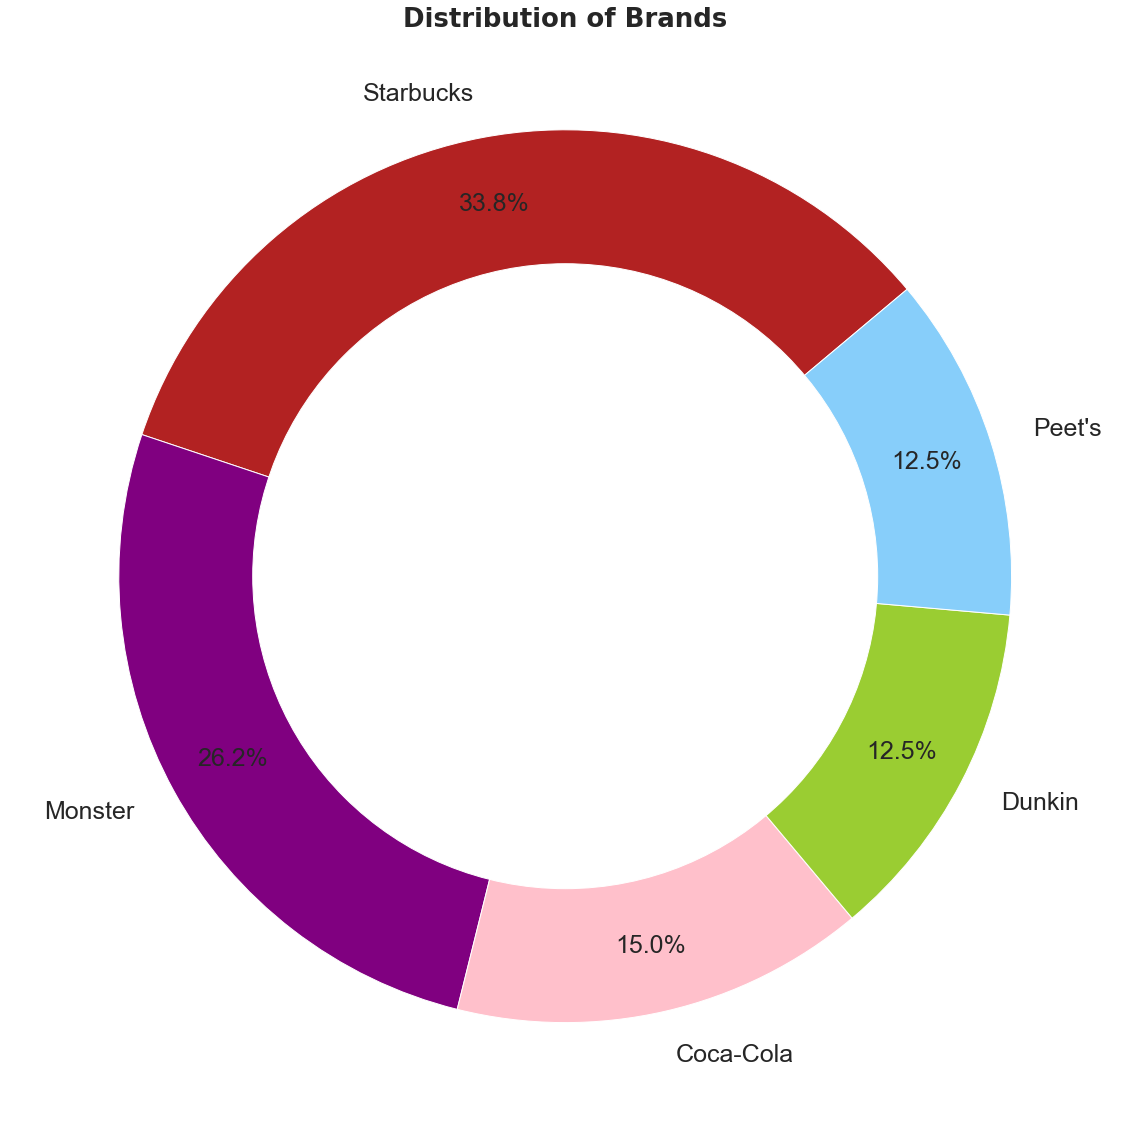

In [48]:
# Since other makes up 87% of all brands, let us exclude it.

mask43 = df2.brand != "Other"

drink_brands = df2.loc[mask43].brand.value_counts().index.tolist()
drink_brand_counts = df2.loc[mask43].brand.value_counts().tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0)

fig = plt.figure(figsize=(20,20))

plt.title("Distribution of Brands", fontsize = 26, fontweight = "bold", font = "DejaVu Sans")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')



plt.pie(drink_brand_counts, explode=explode, labels=drink_brands, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 25}, pctdistance=0.85)

fig.gca().add_artist(centre_circle)
plt.show()

Let us do a TTest to see if there is a difference in caffeine between some brands. However, the sample size is small, and one outlier would destroy everything. We already know Starbucks has some massive outliers.

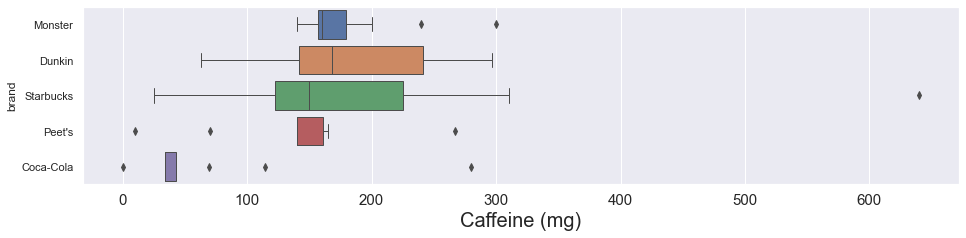

In [49]:
# Box Plot of Caffeine distribution to see outliers

mask43 = df2.brand != "Other"

sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.boxplot(data=df2.loc[mask43], x="Caffeine (mg)", y="brand", linewidth=1)#, palette = {"forestgreen"})
#sns.despine(left=True)
plt.xlabel("Caffeine (mg)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

In [50]:
# We will focus on Monster, Dunkin and Starbucks. There are three outliers. Let us get rid of them.

maskb1 = (df2.brand == "Monster") & (df2["Caffeine (mg)"] < 220)
maskb2 = (df2.brand == "Starbucks") & (df2["Caffeine (mg)"] < 500)
maskb3 = (df2.brand == "Dunkin")
df2brandsTTest = df2.loc[maskb1 | maskb2 | maskb3]

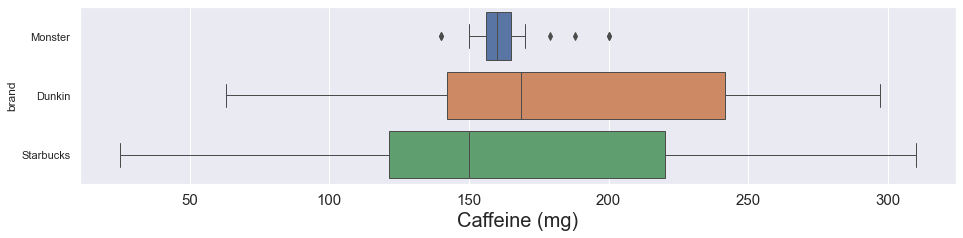

In [51]:
# Box Plot of Caffeine distribution to see if outliers have been removed

sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.boxplot(data=df2brandsTTest, x="Caffeine (mg)", y="brand", linewidth=1)#, palette = {"forestgreen"})
#sns.despine(left=True)
plt.xlabel("Caffeine (mg)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

In [52]:
df2brandsTTest.groupby("brand").mean()["Caffeine (mg)"]

brand
Dunkin       180.200000
Monster      163.736842
Starbucks    157.500000
Name: Caffeine (mg), dtype: float64

In [53]:
df2brandsTTest.groupby("brand").var()["Caffeine (mg)"]

brand
Dunkin       5762.177778
Monster       287.649123
Starbucks    5704.500000
Name: Caffeine (mg), dtype: float64

We see that the variances of Dunkin an dStarbucks are very similar even though the means of Monster and Starbucks are very similar. We will do TTests to compare both.

In [54]:
sdc = df2brandsTTest.loc[df2brandsTTest.brand == "Starbucks"]["Caffeine (mg)"].tolist()
mdc = df2brandsTTest.loc[df2brandsTTest.brand == "Monster"]["Caffeine (mg)"].tolist()
ddc = df2brandsTTest.loc[df2brandsTTest.brand == "Dunkin"]["Caffeine (mg)"].tolist()

In [55]:
# Ttest between Starbucks and Monster for Caffeine content

sp.ttest_ind(sdc, mdc, equal_var=False)

Ttest_indResult(statistic=-0.40724265308274, pvalue=0.6868850926198921)

In [56]:
# Ttest between Starbucks and Dunkin for Caffeine content

sp.ttest_ind(sdc, ddc, equal_var=False)

Ttest_indResult(statistic=-0.8047714631978465, pvalue=0.43252874773924166)

In [57]:
# Ttest between Monster and Dunkin for Caffeine content

sp.ttest_ind(mdc, ddc, equal_var=False)

Ttest_indResult(statistic=-0.6769992647930914, pvalue=0.5145925759179389)

In [58]:
#Anova for Starbucks, Monster, and Dunkin

sp.f_oneway(sdc, mdc, ddc)

F_onewayResult(statistic=0.4846563605448738, pvalue=0.6186630052752647)

In [59]:
# Rename columns and create a nice presentation of the dataframe

df3 = df2.rename(columns = {"drink": "Drink Name", "type": "Type", "caffeine_per_100ml": "Caffeine per 100 ml",
                            "calories_per_100ml": "Calories per 100 ml", "Volume (ml)": "Volume (ml)  ",
                            "Calories": "Calories", "diet": "Calorie level", "brand": "Brand"})
#df3.style.set_properties(**{'text-align': 'center'})
#df3.groupby("Type").head(1).set_index("Drink Name")

df3 = df3.groupby("Type").head(1).style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
df3.set_properties(**{'text-align': 'left'}).hide_index()

C:\Users\sajid\AppData\Local\Temp\ipykernel_12768\2607809021.py:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df3.set_properties(**{'text-align': 'left'}).hide_index()


Drink Name,Volume (ml),Calories,Caffeine (mg),Type,Caffeine per 100 ml,Calories per 100 ml,Calorie level,Brand
Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000,Diet,Other
28 Black Energy Drink,250.191810,125,80,Energy Drinks,31.975467,49.961667,Regular,Other
Spike Energy Double Shot,125.983110,0,350,Energy Shots,277.815018,0.000000,Regular,Other
Red Bull Simply Cola,250.191810,0,32,Soft Drinks,12.790187,0.000000,Diet,Other
PG Tips Black Tea,200.508330,0,50,Tea,24.936620,0.000000,Regular,Other
Perrier Energize,250.191810,35,99,Water,39.569641,13.989267,Regular,Other


This Section is about creating top ten and bottom ten bar graphs for different types.

In [60]:
file = df.copy()

In [61]:
#Dataframe for Energy Shot sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfes = file.loc[file.type=="Energy Shots"].reset_index()
dfes = dfes.sort_values(by=['Caffeine (mg)'], ascending=False)
dfes = dfes.drop(['index'], axis=1)
dfes.head(1)

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Spike Energy Double Shot,125.98311,0,350,Energy Shots


In [62]:
#Dataframe for Coffee sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfc = file.loc[file.type=="Coffee"].reset_index()
dfc = dfc.sort_values(by=['Caffeine (mg)'], ascending=False)
dfc = dfc.drop(['index'], axis=1)
dfc.head(1)

,drink,Volume (ml),Calories,Caffeine (mg),type
85,Black Label Brewed Coffee,354.882,0,1555,Coffee


In [63]:
#Dataframe for Energy Drink sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfed = file.loc[file.type=="Energy Drinks"].reset_index()
dfed = dfed.sort_values(by=['Caffeine (mg)'], ascending=False)
dfed = dfed.drop(['index'], axis=1)
dfed.head(1)


,drink,Volume (ml),Calories,Caffeine (mg),type
175,Hyde Xtreme,354.882,0,400,Energy Drinks


In [64]:
#Dataframe for Soft Drink sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfsd = file.loc[file.type=="Soft Drinks"].reset_index()
dfsd = dfsd.sort_values(by=['Caffeine (mg)'], ascending=False)
dfsd = dfsd.drop(['index'], axis=1)
dfsd.head(1)

,drink,Volume (ml),Calories,Caffeine (mg),type
6,Bawls,473.176,190,102,Soft Drinks


In [65]:
#Dataframe for Tea sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water'] 
dft = file.loc[file.type=="Tea"].reset_index()
dft = dft.sort_values(by=['Caffeine (mg)'], ascending=False)
dft = dft.drop(['index'], axis=1)
dft.head(1)

,drink,Volume (ml),Calories,Caffeine (mg),type
10,Inko's White Tea Energy,458.38925,100,165,Tea


In [66]:
#Dataframe for water sorted by Caffeine
types=['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water']
dfw = file.loc[file.type=="Water"].reset_index()
dfw = dfw.sort_values(by=['Caffeine (mg)'], ascending=False)
dfw = dfw.drop(['index'], axis=1)
dfw.head(1)

,drink,Volume (ml),Calories,Caffeine (mg),type
14,Arti Sparkling Water,354.882,0,120,Water


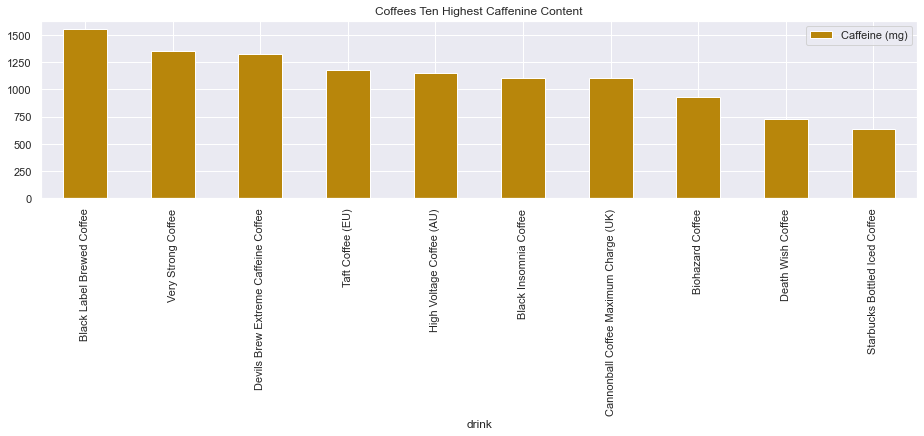

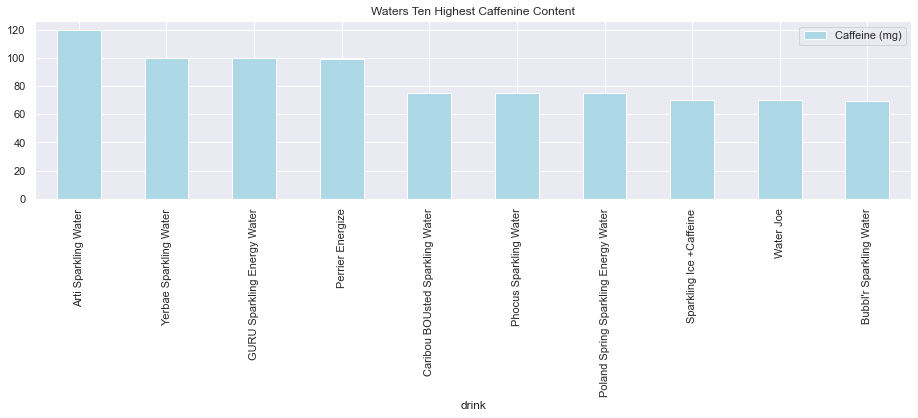

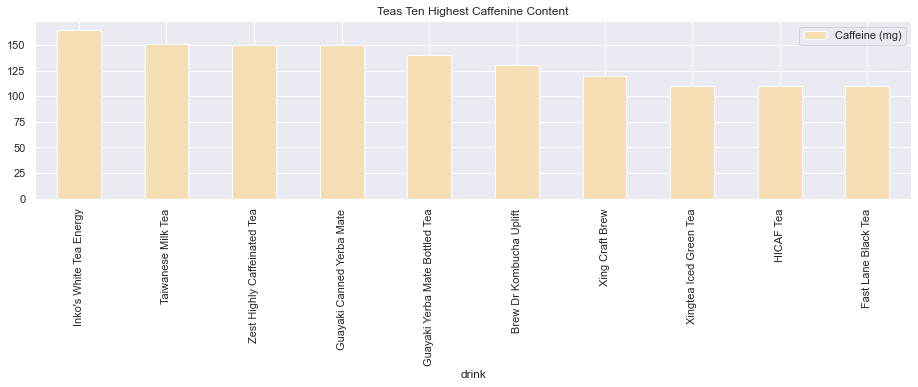

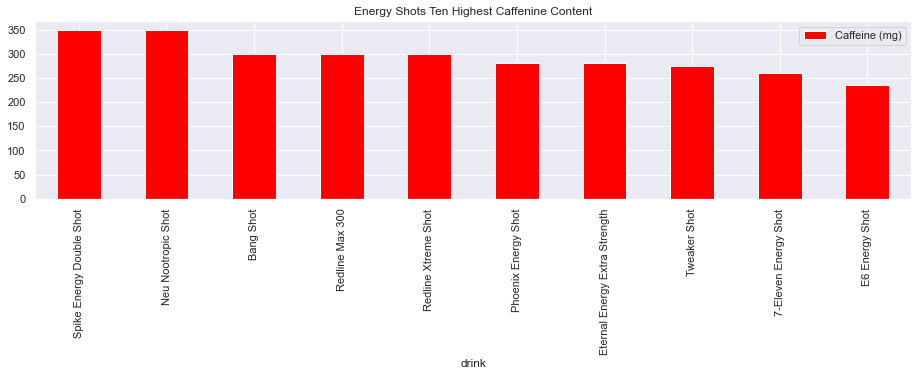

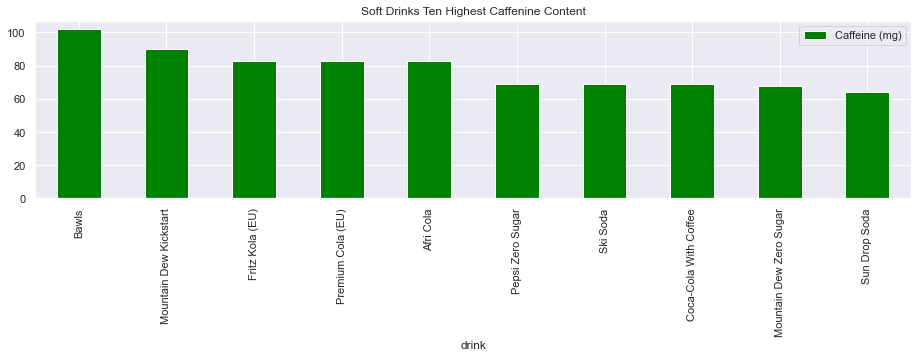

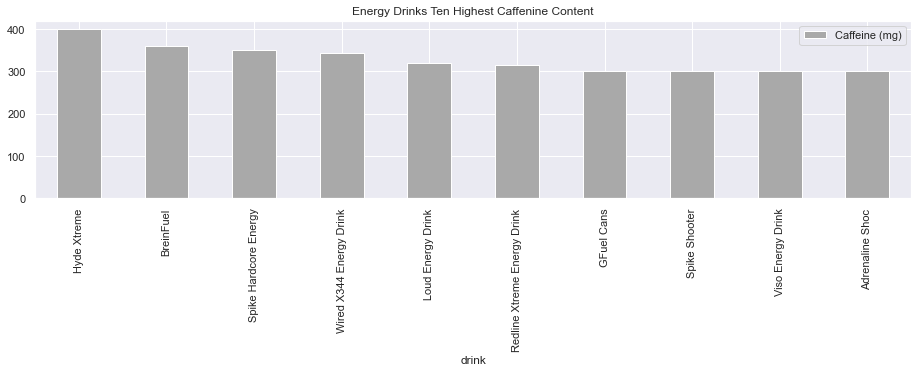

In [67]:
#Bar charts for top ten highest caffeine by type
s1 = dfc.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x='drink', title='Coffees Ten Highest Caffenine Content', color=['darkgoldenrod'])
s2 = dfw.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Waters Ten Highest Caffenine Content', color=['lightblue'])
s3 = dft.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Teas Ten Highest Caffenine Content', color=['wheat'])
s4 = dfes.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Energy Shots Ten Highest Caffenine Content', color=['red'])
s5 = dfsd.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Soft Drinks Ten Highest Caffenine Content', color=['green'])
s6 = dfed.loc[:, ["drink", "Caffeine (mg)"]].head(10).plot.bar(x= 'drink', title='Energy Drinks Ten Highest Caffenine Content', color=['darkgrey'])

plt.show()

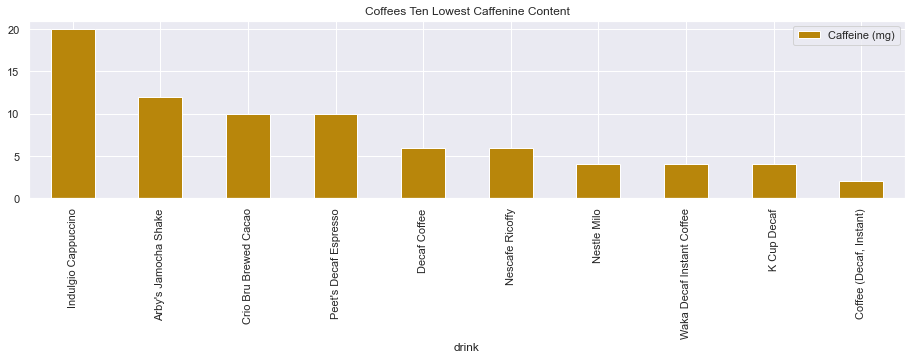

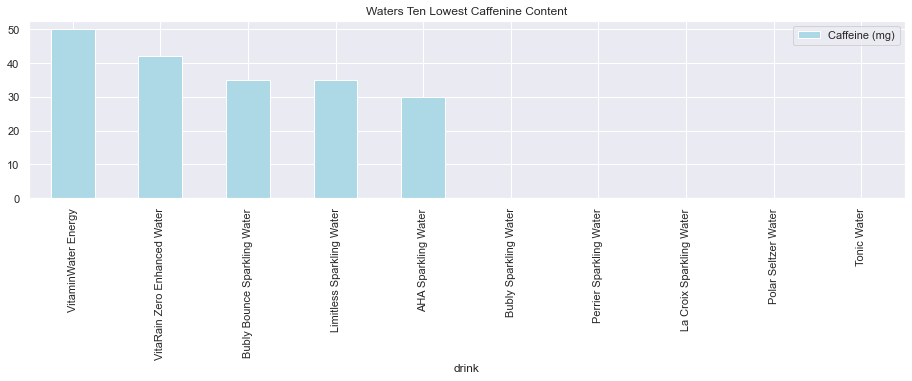

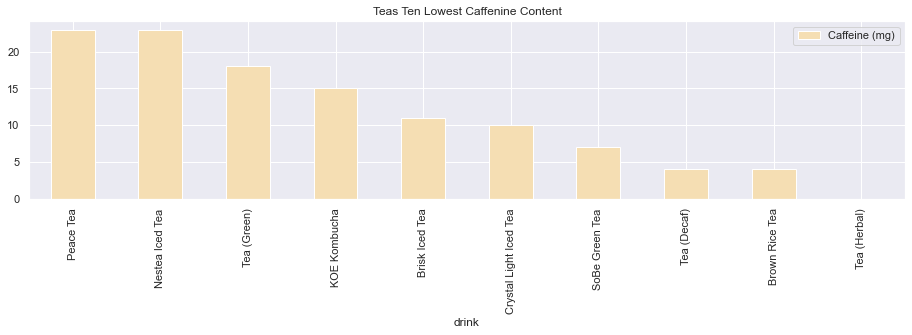

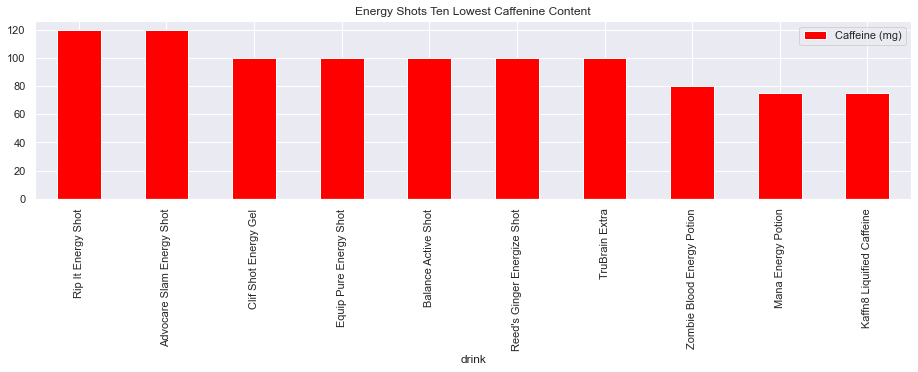

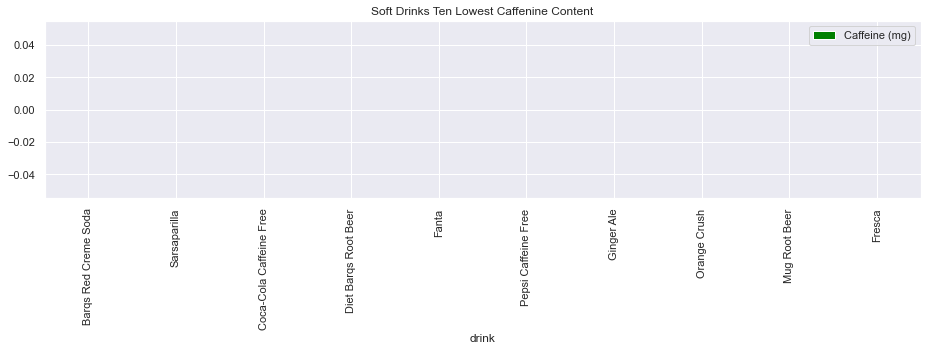

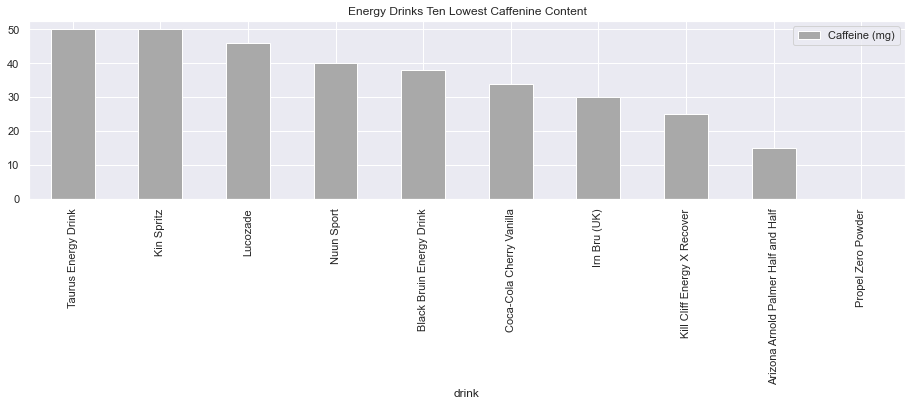

In [68]:
#Bar charts for lowest ten caffeine content by type
s1 = dfc.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x='drink', title='Coffees Ten Lowest Caffenine Content', color=['darkgoldenrod'])
s2 = dfw.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Waters Ten Lowest Caffenine Content', color=['lightblue'])
s3 = dft.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Teas Ten Lowest Caffenine Content',color=['wheat'])
s4 = dfes.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Energy Shots Ten Lowest Caffenine Content', color=['red'])
s5 = dfsd.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Soft Drinks Ten Lowest Caffenine Content', color=['green'])
s6 = dfed.loc[:, ["drink", "Caffeine (mg)"]].tail(10).plot.bar(x= 'drink', title='Energy Drinks Ten Lowest Caffenine Content', color=['darkgrey'])

plt.show()

This section is about creating different bar graphs for a brand analysis

In [69]:
# Get the "Peets" drinks
df2peet = df2.loc[df2.drink.str.contains('Peet')]
df2peet["brand"]="Peets"
df2peet.head(3)

C:\Users\sajid\AppData\Local\Temp\ipykernel_12768\52462298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2peet["brand"]="Peets"


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand
24,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000,Diet,Peets
25,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000,Diet,Peets
49,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689,Diet,Peets


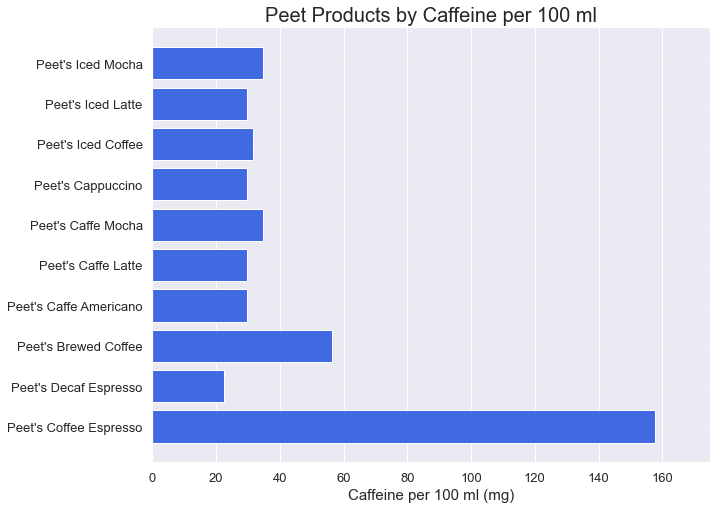

In [70]:
## Bar chart for "Peets" drinks by caffeine density (mg)

# step 1, get the data
y = df2peet.drink
x = df2peet["caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="royalblue")

# step 3, customization
plt.title("Peet Products by Caffeine per 100 ml", fontsize = 20)
plt.xlabel("Caffeine per 100 ml (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, 175)
plt.xticks(rotation=0, fontsize = 13)
plt.yticks(rotation=0, fontsize = 13)
# step 4, saving/showing
plt.show()

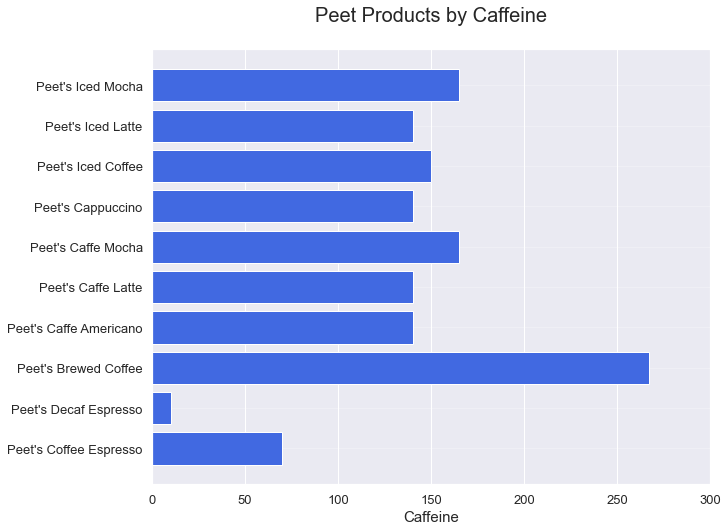

In [71]:
#Bar chart for "Peets" drinks by caffeine content (mg)

# step 1, get the data
y = df2peet.drink
x = df2peet["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="royalblue")

# step 3, customization
plt.title("Peet Products by Caffeine\n", fontsize = 20)
plt.xlabel("Caffeine", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, 300)
plt.xticks(rotation=0, fontsize = 13)
plt.yticks(rotation=0, fontsize = 13)
# step 4, saving/showin
plt.show()

In [72]:
# Filter the list of "Starbucks" drinks

df2starbucks = df2.loc[df2.drink.str.contains('Starbucks')]
df2starbucks["brand"]="Starbucks"
df2starbucks.head(3)

#Sort Starbucks drink by Caffeine content

df2starbucks_sorted1=df2starbucks.sort_values(by="Caffeine (mg)", ascending=False)
df2starbucks_sorted1.head(3)

#Sort Starbucks drink by Caffeine density (Caffeine per 100 ml)

df2starbucks_sorted2=df2starbucks.sort_values(by="caffeine_per_100ml", ascending=False)
df2starbucks_sorted2.head(3)

C:\Users\sajid\AppData\Local\Temp\ipykernel_12768\4025053879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2starbucks["brand"]="Starbucks"


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand
151,Starbucks 2X Coffee Pods,236.5880,0,260,Coffee,109.895684,0.000000,Diet,Starbucks
107,Starbucks Canned Nitro Cold Brew,325.3085,0,235,Coffee,72.239121,0.000000,Diet,Starbucks
152,Starbucks Cordusio Mocha,236.5880,130,155,Coffee,65.514734,54.947842,Regular,Starbucks


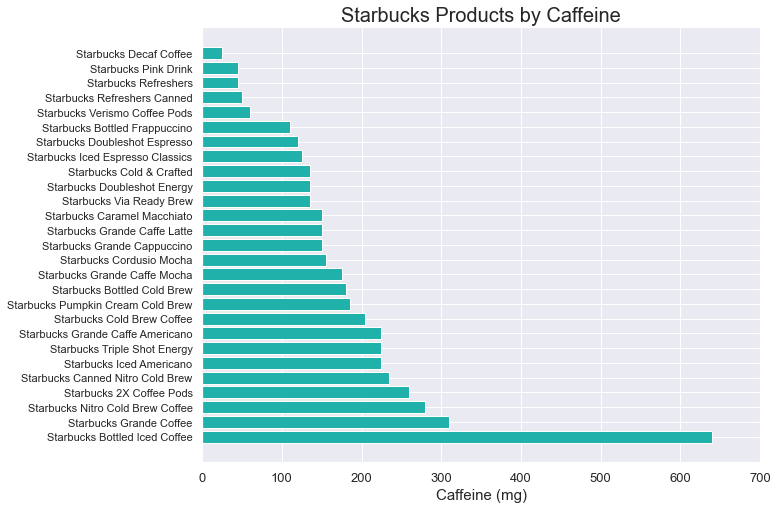

In [73]:
#Bar chart for "Starbucks" drinks by caffeine content (mg)
# step 1, get the data
y = df2starbucks_sorted1.drink
x = df2starbucks_sorted1["Caffeine (mg)"]

# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="lightseagreen")

# step 3, customization
plt.title("Starbucks Products by Caffeine", fontsize = 20)
plt.xlabel("Caffeine (mg)", fontsize = 15)
# plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, 700)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

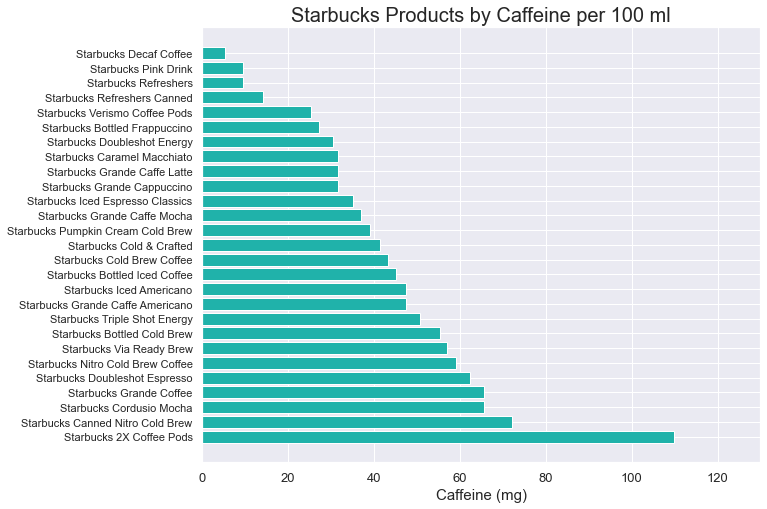

In [74]:
##Bar chart for "Starbucks" drinks by caffeine density (mg)
# step 1, get the data
y = df2starbucks_sorted2.drink
x = df2starbucks_sorted2["caffeine_per_100ml"]

# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="lightseagreen")

# step 3, customization
plt.title("Starbucks Products by Caffeine per 100 ml", fontsize = 20)
plt.xlabel("Caffeine (mg)", fontsize = 15)
# plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+20)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

In [75]:
# Filter the list of "Dunkin" drinks

df2dunkin = df2.loc[df2.drink.str.contains('Dunkin')]
df2dunkin["brand"]="Dunkin"
df2dunkin.head(3)

C:\Users\sajid\AppData\Local\Temp\ipykernel_12768\1092874094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2dunkin["brand"]="Dunkin"


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand
6,Dunkin Donuts Shot In The Dark,239.54535,80,134,Coffee,55.939303,33.396599,Regular,Dunkin
15,Bottled Iced Coffee Dunkin Donuts,405.15695,260,171,Coffee,42.205866,64.172662,Regular,Dunkin
31,Dunkin' Cold Brew,709.76400,5,260,Coffee,36.631895,0.704460,Diet,Dunkin


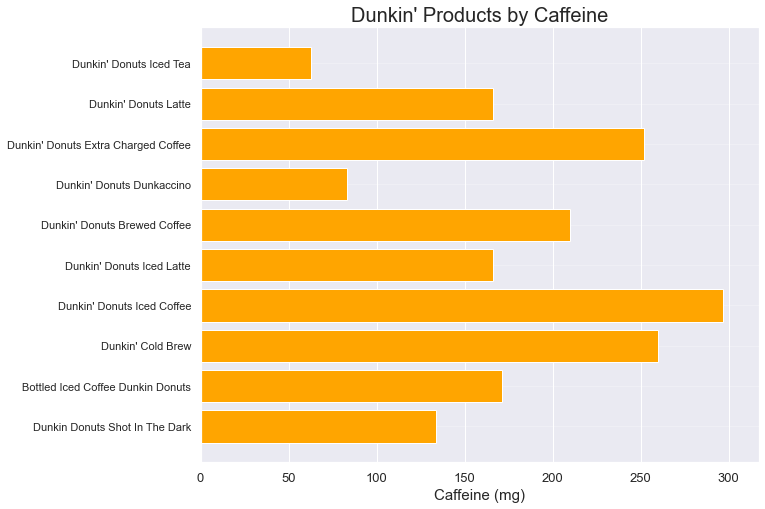

In [76]:
#Bar chart for "Dunkin" drinks by caffeine content (mg)
# step 1, get the data
y = df2dunkin.drink
x = df2dunkin["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="orange")

# step 3, customization
plt.title("Dunkin' Products by Caffeine", fontsize=20)
plt.xlabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+20)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

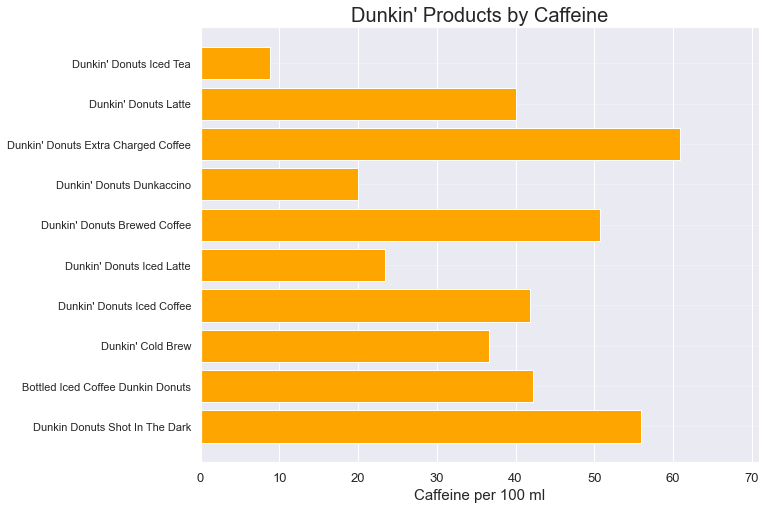

In [77]:
#Bar chart for "Dunkin" drinks by caffeine density (caffeine per 100 ml)
# step 1, get the data
y = df2dunkin.drink
x = df2dunkin["caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="orange")

# step 3, customization
plt.title("Dunkin' Products by Caffeine", fontsize=20)
plt.xlabel("Caffeine per 100 ml", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+10)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

In [78]:
## Filter the list of "CocaCola" drinks

df2coca_cola = df2.loc[df2.drink.str.contains("Coca-Cola")].reset_index(drop = True)
df2coca_cola["brand"]="Coca_Cola"
df2coca_cola.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand
0,Coca-Cola Cherry Vanilla,354.882,140,34,Energy Drinks,9.580649,39.449733,Regular,Coca_Cola
1,Coca-Cola Energy,354.882,140,114,Energy Drinks,32.123354,39.449733,Regular,Coca_Cola
2,Coca-Cola Caffeine Free,354.882,140,0,Soft Drinks,0.000000,39.449733,Regular,Coca_Cola


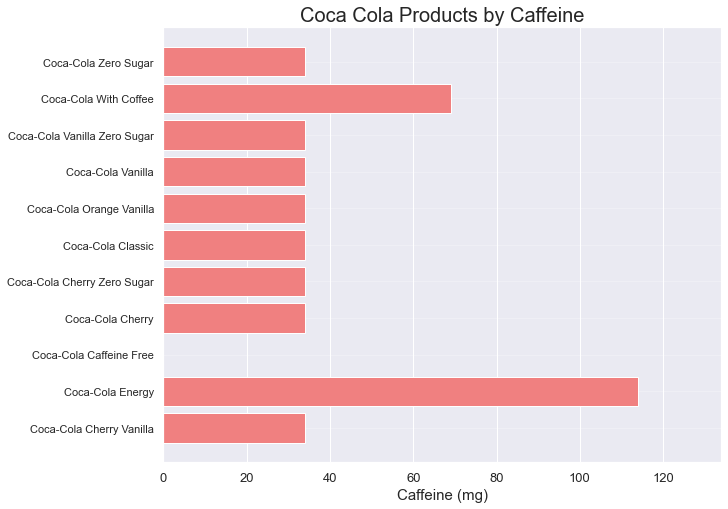

In [79]:
#Bar chart for "Coca Cola" drinks by caffeine content
# step 1, get the data
y = df2coca_cola.drink
x = df2coca_cola["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="lightcoral")

# step 3, customization
plt.title("Coca Cola Products by Caffeine", fontsize=20)
plt.xlabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+20)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

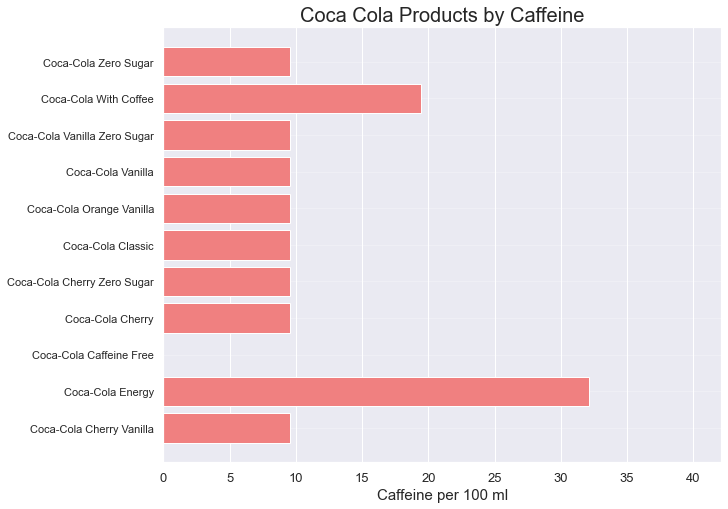

In [80]:
#Bar chart for "Coca Cola" drinks by caffeine density (caffeine per 100 ml)
# step 1, get the data
y = df2coca_cola.drink
x = df2coca_cola["caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="lightcoral")

# step 3, customization
plt.title("Coca Cola Products by Caffeine", fontsize=20)
plt.xlabel("Caffeine per 100 ml", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+10)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

In [81]:
# Filter the list of "Monster" drinks

df2monster = df2.loc[df2.drink.str.contains('Monster')].reset_index(drop = True)
df2monster["brand"]="Monster"
df2monster.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand
0,Espresso Monster,248.4174,170,160,Coffee,64.407727,68.433210,Regular,Monster
1,Monster Hydro,751.1669,150,188,Energy Drinks,25.027727,19.968931,Regular,Monster
2,Monster Import,550.0671,190,179,Energy Drinks,32.541484,34.541241,Regular,Monster


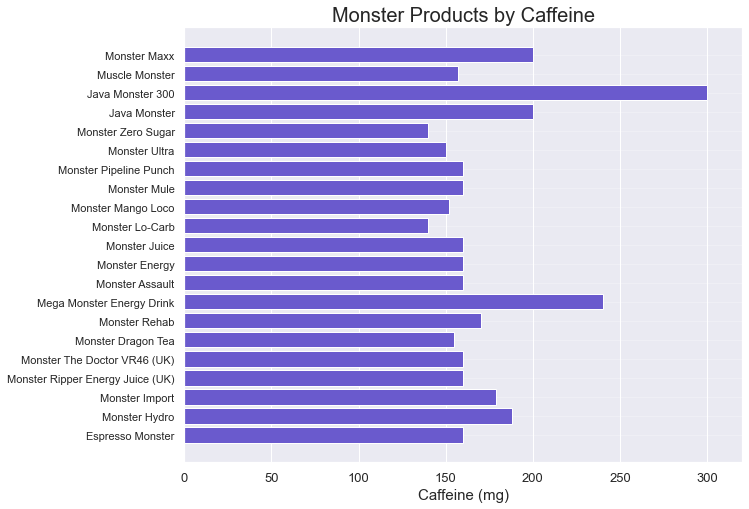

In [82]:
##Bar chart for "Monster" drinks by caffeine content (mg)
# step 1, get the data
y = df2monster.drink
x = df2monster["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="slateblue")

# step 3, customization
plt.title("Monster Products by Caffeine", fontsize=20)
plt.xlabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+20)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

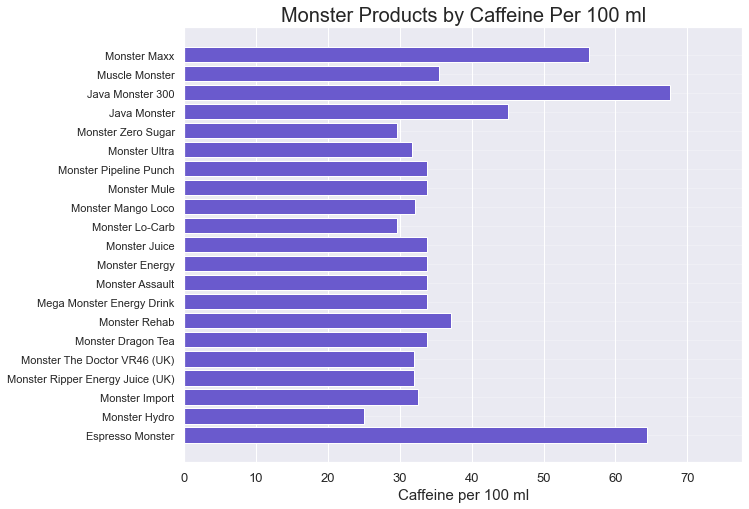

In [83]:
##Bar chart for "Monster" drinks by caffeine density (caffeine per 100 ml)
# step 1, get the data
y = df2monster.drink
x = df2monster["caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="slateblue")

# step 3, customization
plt.title("Monster Products by Caffeine Per 100 ml", fontsize=20)
plt.xlabel("Caffeine per 100 ml", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+10)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

In [84]:
# combine all brands into one

merge1df = pd.merge(df2peet, df2starbucks, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")

merge2df = pd.merge(merge1df, df2dunkin, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")

merge3df = pd.merge(merge2df, df2monster, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")

merge4df = pd.merge(merge3df, df2coca_cola, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")
merge4df.head(3)

C:\Users\sajid\AppData\Local\Temp\ipykernel_12768\3869813882.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'diet_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3df = pd.merge(merge2df, df2monster, on=["brand","drink", "Volume (ml)","Calories","Caffeine (mg)","type","caffeine_per_100ml","calories_per_100ml"],how="outer")


,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet_x,brand,diet_y,diet_x,diet_y,diet
0,Peet's Coffee Espresso,44.36025,0,70,Coffee,157.798930,0.000000,Diet,Peets,NaN,NaN,NaN,NaN
1,Peet's Decaf Espresso,44.36025,0,10,Coffee,22.542704,0.000000,Diet,Peets,NaN,NaN,NaN,NaN
2,Peet's Brewed Coffee,473.17600,5,267,Coffee,56.427207,1.056689,Diet,Peets,NaN,NaN,NaN,NaN


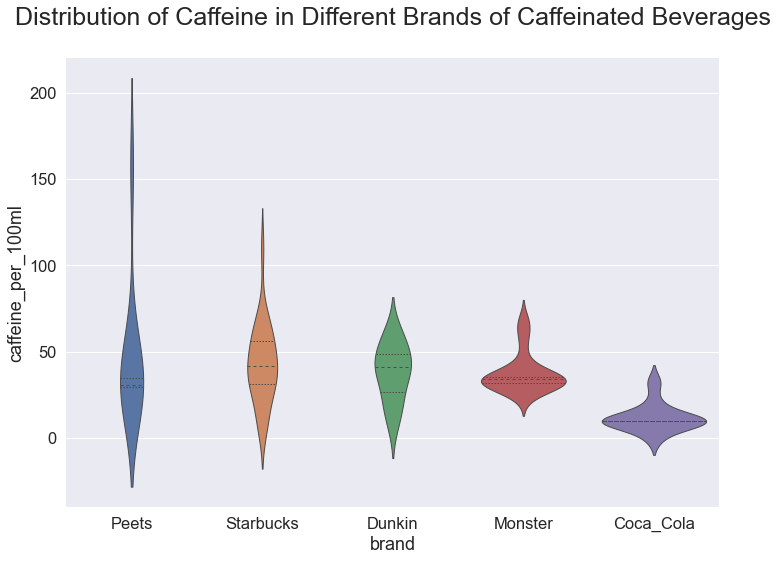

In [85]:
#VIOLIN CHART OF 5 brands by caffeine per 100 ml
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
sns.violinplot(data=merge4df, x="brand", y="caffeine_per_100ml", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

#sns.set_style("whitegrid")
sns.set_theme(style='white')
#sns.set(font_scale = 2)

#sns.set(x_label = "Types of Caffeinated Beverages")
#sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)",
#hue="Calorie Type", split = True,
#palette={"Regular": "forestgreen", "Diet": "orange"})
#split=True, inner="quart", linewidth=1,
plt.title('Distribution of Caffeine in Different Brands of Caffeinated Beverages\n', size=25)
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)

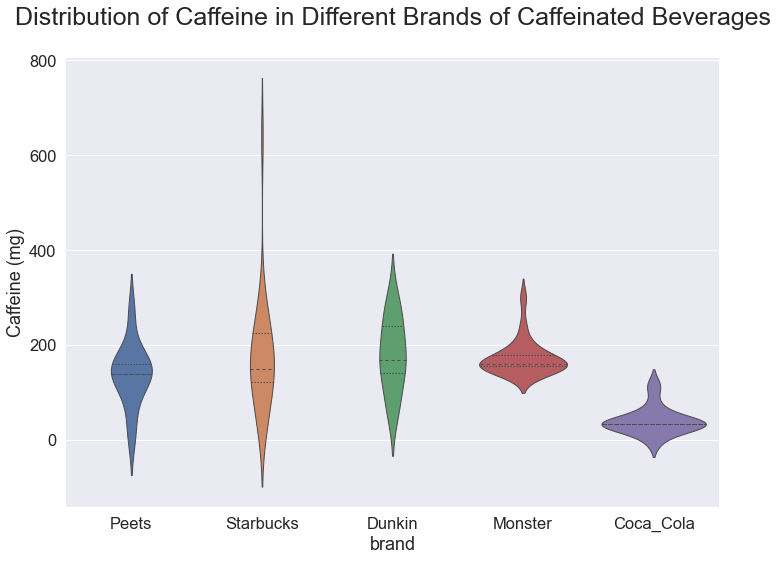

In [86]:
#VIOLIN CHART for 5 brands by caffeine content

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
sns.violinplot(data=merge4df, x="brand", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

#sns.set_style("whitegrid")
sns.set_theme(style='white')
#sns.set(font_scale = 2)

#sns.set(x_label = "Types of Caffeinated Beverages")
#sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)",
#hue="Calorie Type", split = True,
#palette={"Regular": "forestgreen", "Diet": "orange"})
#split=True, inner="quart", linewidth=1,
plt.title('Distribution of Caffeine in Different Brands of Caffeinated Beverages\n', size=25)
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)

In [87]:
#Filter the data by Water type

df2water=df2.loc[df2.type=="Water"]
df2water.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand
584,Perrier Energize,250.19181,35,99,Water,39.569641,13.989267,Regular,Other
585,3 Water,499.79215,0,50,Water,10.004159,0.000000,Regular,Other
586,Heroec Energy Water,499.79215,0,60,Water,12.004990,0.000000,Regular,Other


In [88]:
#Filter the sparkling water from the water dataset

df2water_sw = df2water.loc[df2water.drink.str.contains('Sparkling')].reset_index(drop = True)
df2water_sw ["subtype"]="Sparkling Water"
df2water_sw.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand,subtype
0,Caribou BOUsted Sparkling Water,340.09525,0,75,Water,22.052646,0.000000,Regular,Other,Sparkling Water
1,Phocus Sparkling Water,340.09525,0,75,Water,22.052646,0.000000,Regular,Other,Sparkling Water
2,Poland Spring Sparkling Energy Water,340.09525,35,75,Water,22.052646,10.291235,Regular,Other,Sparkling Water


In [89]:
# Sort the sparkling water by caffeine
df2water_sw_sorted=df2water_sw.sort_values(by="Caffeine (mg)", ascending=False)
df2water_sw_sorted.head(3)   

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand,subtype
6,Arti Sparkling Water,354.882,0,120,Water,33.814057,0.0,Regular,Other,Sparkling Water
10,GURU Sparkling Energy Water,354.882,0,100,Water,28.178380,0.0,Regular,Other,Sparkling Water
14,Yerbae Sparkling Water,354.882,0,100,Water,28.178380,0.0,Regular,Other,Sparkling Water


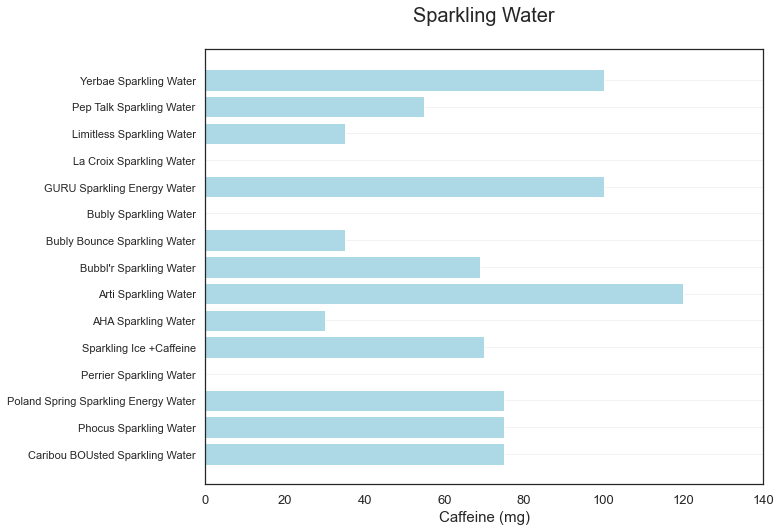

In [90]:
# ##Bar chart for sparking water by caffeine content
# step 1, get the data
y = df2water_sw .drink
x = df2water_sw ["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="lightblue")

# step 3, customization
plt.title("Sparkling Water\n", fontsize=20)
plt.xlabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+20)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

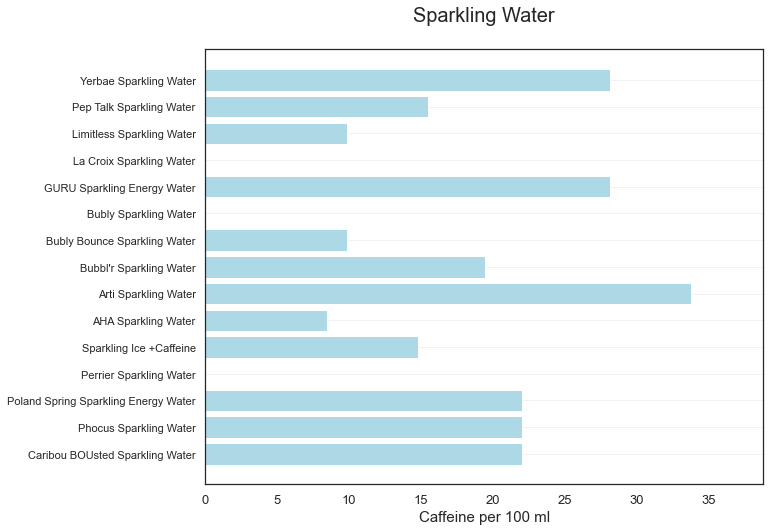

In [91]:
# ##Bar chart for sparking water by caffeine density (caffeine per 100 ml)
# step 1, get the data
y = df2water_sw .drink
x = df2water_sw ["caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="lightblue")

# step 3, customization
plt.title("Sparkling Water\n", fontsize=20)
plt.xlabel("Caffeine per 100 ml", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+5)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

In [92]:
#Filter the energy water from the water dataset
df2water_ew= df2water.loc[df2water.drink.str.contains('Energy')].reset_index(drop = True)
df2water_ew ["subtype"]="Energy Water"
df2water_ew 

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand,subtype
0,Heroec Energy Water,499.79215,0,60,Water,12.004990,0.000000,Regular,Other,Energy Water
1,Poland Spring Sparkling Energy Water,340.09525,35,75,Water,22.052646,10.291235,Regular,Other,Energy Water
2,VitaminWater Energy,591.47000,100,50,Water,8.453514,16.907028,Regular,Other,Energy Water
3,Polar Frost Plus Energy,502.74950,10,67,Water,13.326716,1.989062,Regular,Other,Energy Water
4,GURU Sparkling Energy Water,354.88200,0,100,Water,28.178380,0.000000,Regular,Other,Energy Water
5,MiO Energy Water Enhancer,236.58800,0,60,Water,25.360542,0.000000,Regular,Other,Energy Water


In [93]:
#Sort the energy water by caffeine content

df2water_ew_sorted=df2water_ew.sort_values(by="Caffeine (mg)", ascending=False)
df2water_ew_sorted 

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand,subtype
4,GURU Sparkling Energy Water,354.88200,0,100,Water,28.178380,0.000000,Regular,Other,Energy Water
1,Poland Spring Sparkling Energy Water,340.09525,35,75,Water,22.052646,10.291235,Regular,Other,Energy Water
3,Polar Frost Plus Energy,502.74950,10,67,Water,13.326716,1.989062,Regular,Other,Energy Water
0,Heroec Energy Water,499.79215,0,60,Water,12.004990,0.000000,Regular,Other,Energy Water
5,MiO Energy Water Enhancer,236.58800,0,60,Water,25.360542,0.000000,Regular,Other,Energy Water
2,VitaminWater Energy,591.47000,100,50,Water,8.453514,16.907028,Regular,Other,Energy Water


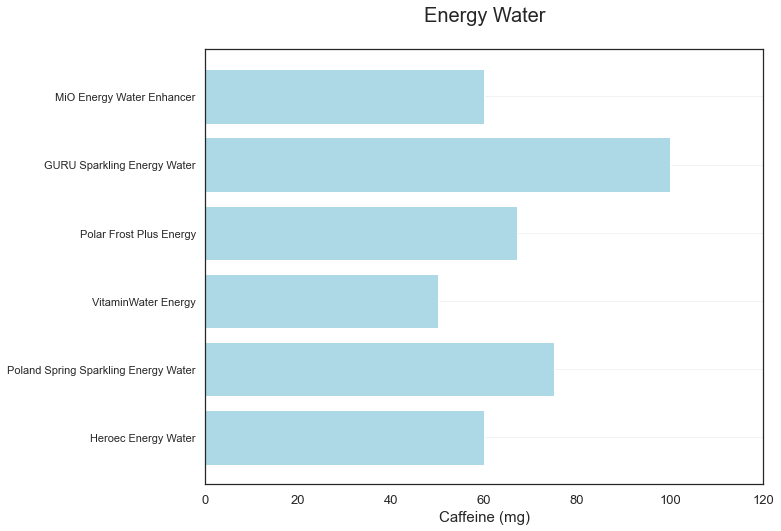

In [94]:
##Bar chart for energy water by caffeine content
# step 1, get the data
y = df2water_ew .drink
x = df2water_ew ["Caffeine (mg)"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="lightblue")

## step 3, customization
plt.title("Energy Water\n", fontsize=20)
plt.xlabel("Caffeine (mg)", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+20)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

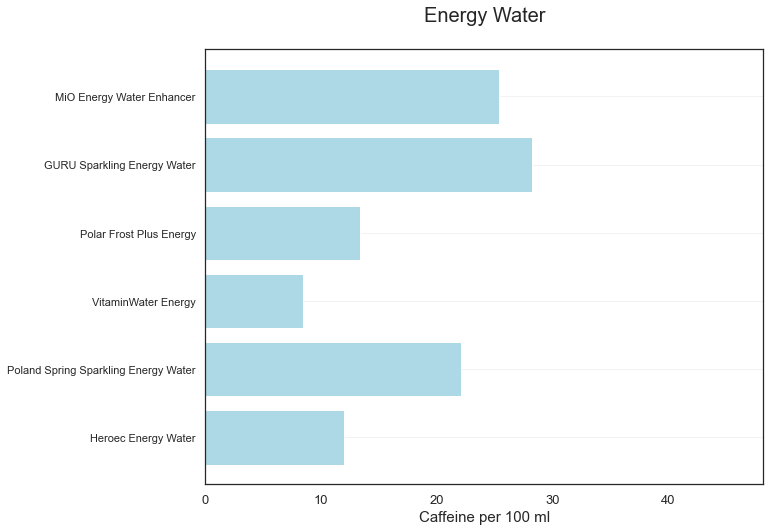

In [95]:
#Bar chart for energy water by caffeine density (caffeine per 100 ml)
# step 1, get the data
y = df2water_ew .drink
x = df2water_ew ["caffeine_per_100ml"]


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.barh(y, x,color="lightblue")

## step 3, customization
plt.title("Energy Water\n", fontsize=20)
plt.xlabel("Caffeine per 100 ml", fontsize = 15)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.xlim(0, max(x)+20)
plt.xticks(rotation=0, fontsize = 13)

# step 4, saving/showing
plt.show()

In [96]:
#Sort the Water data by energy water, sparkling water and other type of water

df2water=df2.loc[df2.type=="Water"].reset_index(drop=True)
df2water["subtype"]="Other"
i = 2
for i in range(len(df2water)):
    if (df2water.loc[i,"drink"].find("Sparkling") > -1):
        df2water.at[i,"subtype"] = "Sparkling"
    if (df2water.loc[i,"drink"].find("Energy") > -1):
        df2water.at[i,"subtype"] = "Energy"
df2water.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet,brand,subtype
0,Perrier Energize,250.19181,35,99,Water,39.569641,13.989267,Regular,Other,Other
1,3 Water,499.79215,0,50,Water,10.004159,0.000000,Regular,Other,Other
2,Heroec Energy Water,499.79215,0,60,Water,12.004990,0.000000,Regular,Other,Energy


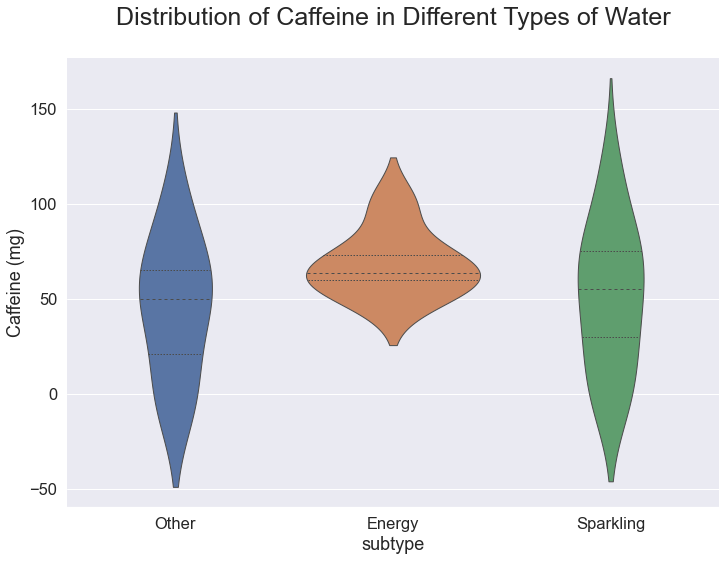

In [97]:
#VIOLIN CHART for 3 types of water

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
sns.violinplot(data=df2water, x="subtype", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

#sns.set_style("whitegrid")
sns.set_theme(style='white')
#sns.set(font_scale = 2)

#sns.set(x_label = "Types of Caffeinated Beverages")
#sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)",
#hue="Calorie Type", split = True,
#palette={"Regular": "forestgreen", "Diet": "orange"})
#split=True, inner="quart", linewidth=1,
plt.title('Distribution of Caffeine in Different Types of Water\n', size=25)
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)